In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from collections import Counter
from math import log2

Diagrams for 1000 files per format in ECB mode (1 key per algorithm)

In [2]:
df_cbc_1800_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_1key_csv/features_all.csv'))
df_cbc_1800_1key

file_name    format   entropy        mean     variance  \
0         file0380.py.enc  pyth_cbc  7.975430  128.420646  5389.583310   
1         file0666.py.enc  pyth_cbc  7.956038  129.482713  5503.419914   
2         file0605.py.enc  pyth_cbc  7.976591  128.052661  5496.776672   
3         file0705.py.enc  pyth_cbc  7.938930  127.600529  5368.043465   
4         file0678.py.enc  pyth_cbc  7.956176  128.205517  5300.127991   
...                   ...       ...       ...         ...          ...   
10795  image_0083.bmp.enc   bmp_cbc  7.997463  127.453839  5440.410459   
10796  image_0234.bmp.enc   bmp_cbc  7.997121  128.106613  5449.098975   
10797  image_0224.bmp.enc   bmp_cbc  7.998284  127.306842  5445.492960   
10798  image_0152.bmp.enc   bmp_cbc  7.998621  127.667952  5471.480301   
10799  image_0142.bmp.enc   bmp_cbc  7.998734  127.322872  5453.873138   

         std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0      73.413781 -0.025905 -1.184919    747957  10.249397  ...             23   
1      74.185038 -0.014317 -1.202608    465286  10.154895  ...             14   
2      74.140250 -0.008124 -1.226710    749250  10.298833  ...             27   
3      73.266933 -0.004004 -1.174174    319718  10.282356  ...             13   
4      72.801978 -0.010065 -1.170839    426765  10.298297  ...              9   
...          ...       ...       ...       ...        ...  ...            ...   
10795  73.759138  0.000666 -1.192649   6298551  10.258089  ...            260   
10796  73.818013 -0.006583 -1.196848   6155155  10.260659  ...            243   
10797  73.793583  0.004080 -1.198171  10685378  10.281232  ...            400   
10798  73.969455 -0.002301 -1.200311  14033818  10.279900  ...            516   
10799  73.850343  0.003178 -1.197743  16587701  10.258194  ...            604   

       histogram_248  histogram_249  histogram_250  histogram_251  \
0                 31             23             32             24   
1                 21             19             19             25   
2                 27             32             22             24   
3                 10             15             14              7   
4                 20             15             13             17   
...              ...            ...            ...            ...   
10795            250            224            236            213   
10796            227            204            238            229   
10797            384            408            395            363   
10798            524            517            484            545   
10799            604            601            600            634   

       histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 29             30             30             30        DES  
1                 21             16             20             19        DES  
2                 24             31             32             25        DES  
3                  7             13             10             14        DES  
4                 18             17             15              8        DES  
...              ...            ...            ...            ...        ...  
10795            224            223            249            227        AES  
10796            252            266            230            227        AES  
10797            387            407            403            382        AES  
10798            547            510            513            584        AES  
10799            618            608            600            634        AES  

[10800 rows x 267 columns]

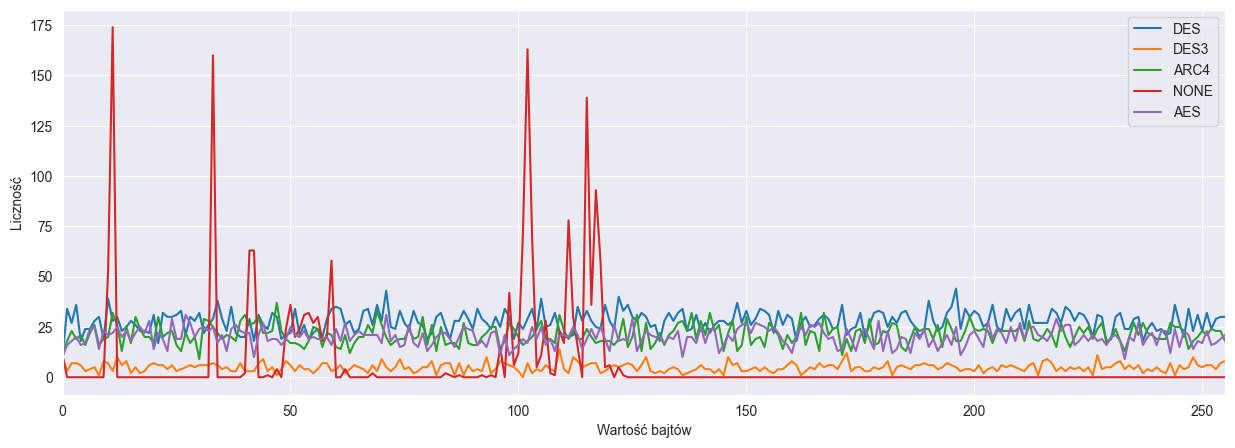

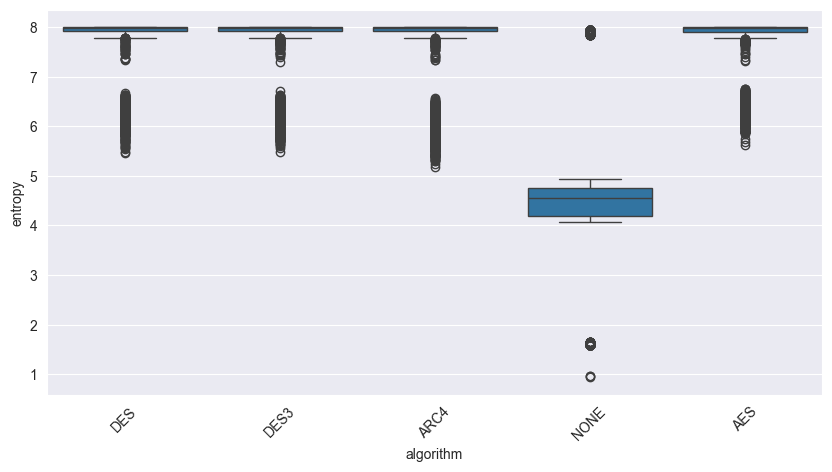

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_cbc_1800_1key["algorithm"].unique()):
    subset = df_cbc_1800_1key[df_cbc_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.xlim(0,255)
#plt.title("Histogram bajtów dla różnych algorytmów i wszystkich formatów plików (1800 plików na format, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cbc_1800_1key["algorithm"], y=df_cbc_1800_1key["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie CBC dla różnych algorytmów i wszystkich formatów plików 1800 plików na format, jeden klucz szyfrujący")
plt.show()

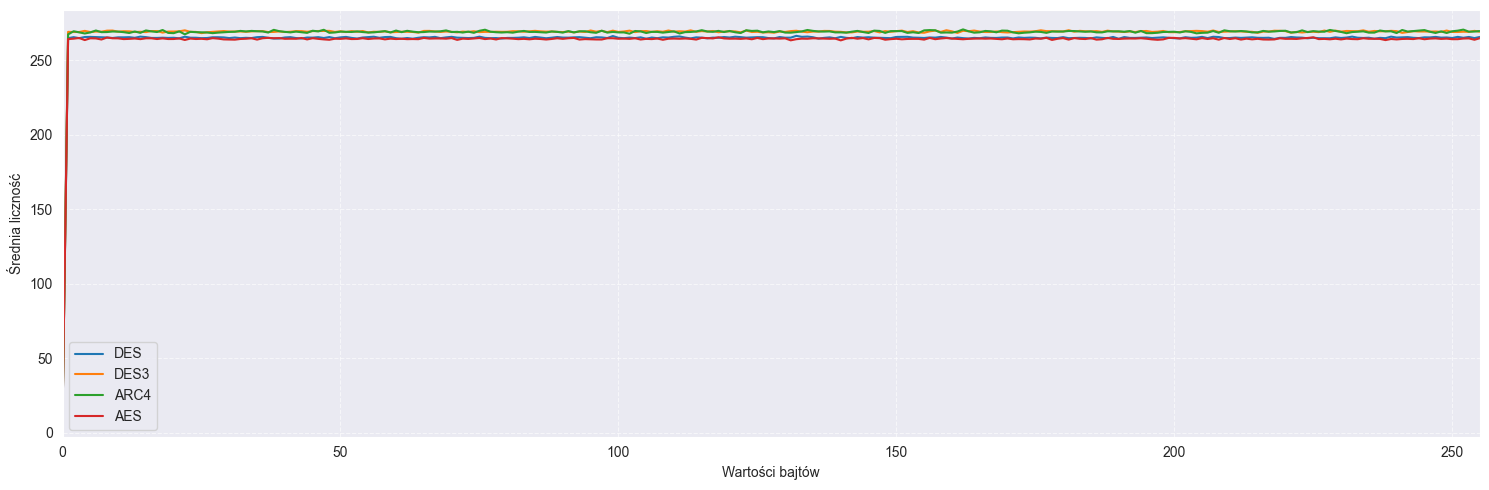

In [4]:
import matplotlib.pyplot as plt

algorithms = df_cbc_1800_1key["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_cbc_1800_1key[df_cbc_1800_1key["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Data frame with 1000 files *.bmp encrypted in ECB mode using 1 key - features


In [4]:
df_bmp_cbc_1800_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_1key_csv/features_bmp_cbc.csv'))
df_bmp_cbc_1800_1key

file_name   format   entropy        mean     variance  \
0     image_0416.bmp.enc  bmp_cbc  7.999327  127.403966  5484.565267   
1     image_0406.bmp.enc  bmp_cbc  7.999099  127.488985  5470.701834   
2     image_0608.bmp.enc  bmp_cbc  7.999448  127.374519  5462.604175   
3     image_0618.bmp.enc  bmp_cbc  7.999194  127.288713  5455.755895   
4     image_0382.bmp.enc  bmp_cbc  7.999156  127.367162  5454.472002   
...                  ...      ...       ...         ...          ...   
1795  image_0083.bmp.enc  bmp_cbc  7.997463  127.453839  5440.410459   
1796  image_0234.bmp.enc  bmp_cbc  7.997121  128.106613  5449.098975   
1797  image_0224.bmp.enc  bmp_cbc  7.998284  127.306842  5445.492960   
1798  image_0152.bmp.enc  bmp_cbc  7.998621  127.667952  5471.480301   
1799  image_0142.bmp.enc  bmp_cbc  7.998734  127.322872  5453.873138   

        std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0     74.057851 -0.000236 -1.203558  28125526  10.262098  ...           1030   
1     73.964193  0.003612 -1.202137  21125560  10.270557  ...            814   
2     73.909432  0.002853 -1.197109  29115609  10.263463  ...           1049   
3     73.863089  0.004697 -1.198692  23383313  10.262682  ...            845   
4     73.854397  0.001404 -1.198629  21415044  10.274412  ...            815   
...         ...       ...       ...       ...        ...  ...            ...   
1795  73.759138  0.000666 -1.192649   6298551  10.258089  ...            260   
1796  73.818013 -0.006583 -1.196848   6155155  10.260659  ...            243   
1797  73.793583  0.004080 -1.198171  10685378  10.281232  ...            400   
1798  73.969455 -0.002301 -1.200311  14033818  10.279900  ...            516   
1799  73.850343  0.003178 -1.197743  16587701  10.258194  ...            604   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0              1073           1061           1059           1074   
1               793            811            831            794   
2              1095           1080           1087           1053   
3               892            907            894            818   
4               836            754            851            793   
...             ...            ...            ...            ...   
1795            250            224            236            213   
1796            227            204            238            229   
1797            384            408            395            363   
1798            524            517            484            545   
1799            604            601            600            634   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0              1025           1024           1028           1000        DES  
1               784            782            762            863        DES  
2              1069           1110           1095           1074        DES  
3               890            825            895            868        DES  
4               761            764            830            764        DES  
...             ...            ...            ...            ...        ...  
1795            224            223            249            227        AES  
1796            252            266            230            227        AES  
1797            387            407            403            382        AES  
1798            547            510            513            584        AES  
1799            618            608            600            634        AES  

[1800 rows x 267 columns]

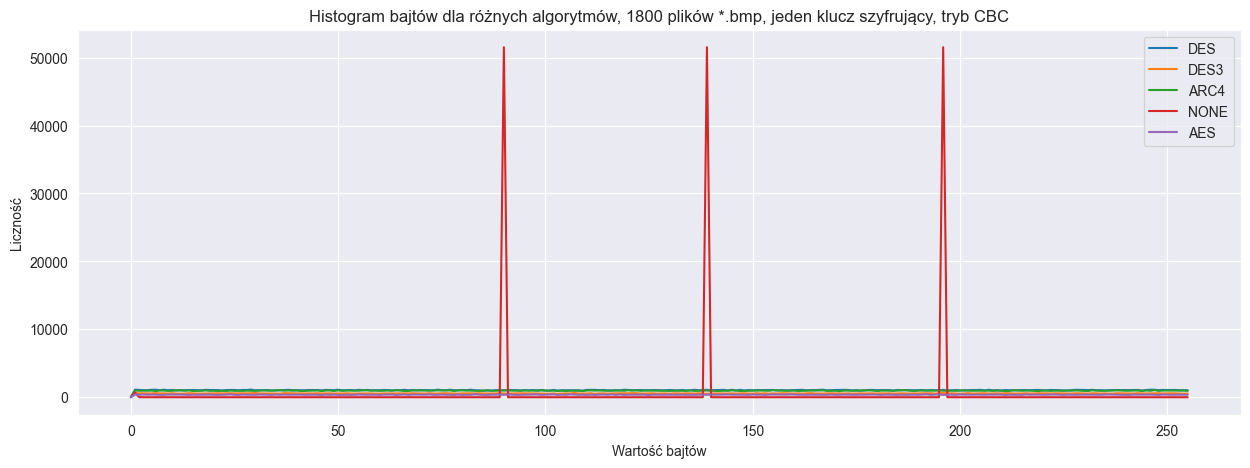

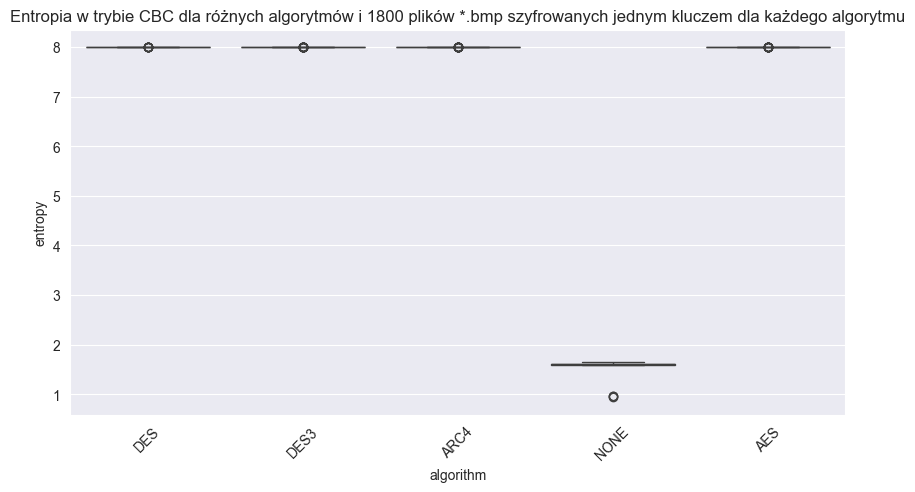

In [5]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_cbc_1800_1key["algorithm"].unique()):
    subset = df_bmp_cbc_1800_1key[df_bmp_cbc_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.bmp, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_cbc_1800_1key["algorithm"], y=df_bmp_cbc_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.bmp szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [6]:
df_csv_cbc_1800_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_1key_csv/features_csv_cbc.csv'))
df_csv_cbc_1800_1key

file_name   format   entropy        mean     variance    std_dev  \
0     file0715.csv.enc  csv_cbc  6.488018  135.841667  5288.999931  72.725511   
1     file0705.csv.enc  csv_cbc  5.975481  114.361111  5447.869599  73.809685   
2     file0473.csv.enc  csv_cbc  6.397461  124.701923  5851.363073  76.494203   
3     file0463.csv.enc  csv_cbc  5.750000  125.609375  5686.081787  75.406112   
4     file0385.csv.enc  csv_cbc  6.370972  136.038462  6141.575444  78.368204   
...                ...      ...       ...         ...          ...        ...   
1795  file0127.csv.enc  csv_cbc  5.862492  137.662500  5301.098594  72.808644   
1796  file0251.csv.enc  csv_cbc  6.037492  115.987500  4867.812344  69.769709   
1797  file0329.csv.enc  csv_cbc  6.021928  138.962500  5477.511094  74.010209   
1798  file0241.csv.enc  csv_cbc  6.678572  133.076389  5520.251109  74.298392   
1799  file0339.csv.enc  csv_cbc  6.376629  115.989583  5043.635308  71.018556   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.084956 -1.318254   14091  10.836282  ...              1   
1     0.170116 -1.078316    6536   9.527737  ...              0   
2     0.122517 -1.193727   10889  10.232396  ...              0   
3    -0.127358 -1.259039    6387   9.989839  ...              1   
4    -0.216041 -1.260911   11588  10.555713  ...              0   
...        ...       ...     ...        ...  ...            ...   
1795 -0.211595 -1.028255    9157  10.698715  ...              1   
1796  0.195690 -1.084228    8009  10.005623  ...              0   
1797 -0.351084 -1.104769    8007  10.004374  ...              0   
1798 -0.107527 -1.255672   15267  10.296642  ...              2   
1799  0.173255 -1.046644    9077   9.723790  ...              1   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 0              1              0              0   
1                 0              0              0              1   
2                 1              0              1              0   
3                 0              0              0              0   
4                 0              2              0              0   
...             ...            ...            ...            ...   
1795              0              1              0              4   
1796              0              0              1              0   
1797              0              0              0              0   
1798              0              0              0              0   
1799              0              0              0              0   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 0              1              0              1        DES  
1                 0              0              1              0        DES  
2                 2              0              0              1        DES  
3                 0              0              0              0        DES  
4                 0              1              0              0        DES  
...             ...            ...            ...            ...        ...  
1795              0              0              0              0        AES  
1796              1              0              0              0        AES  
1797              1              0              0              0        AES  
1798              2              0              1              1        AES  
1799              0              1              1              1        AES  

[1800 rows x 267 columns]

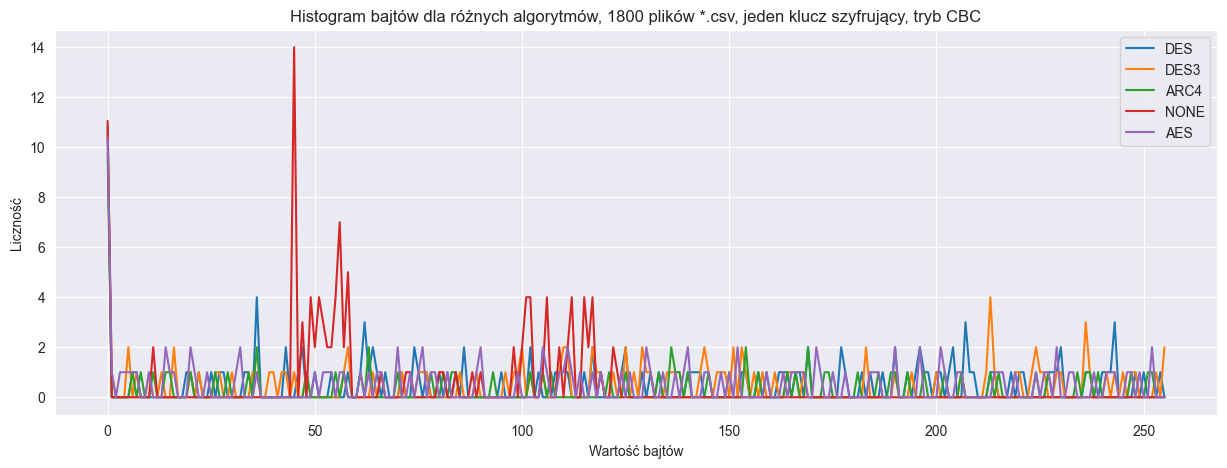

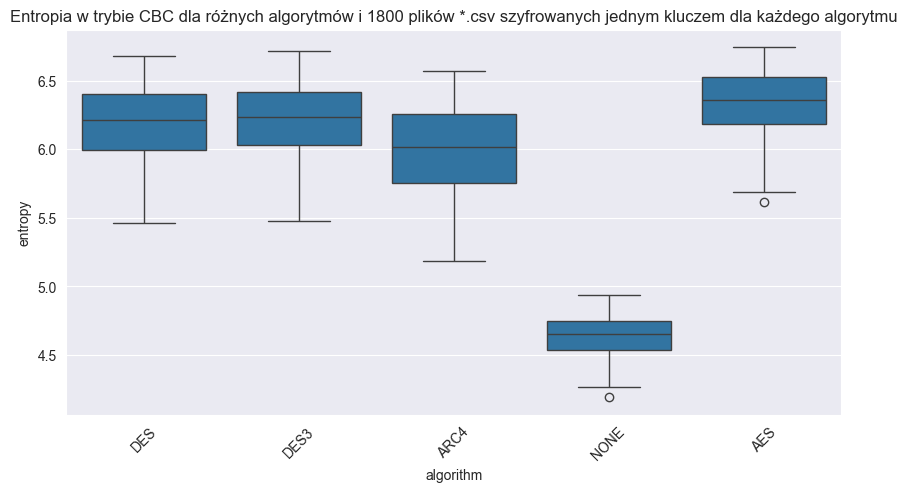

In [7]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_cbc_1800_1key["algorithm"].unique()):
    subset = df_csv_cbc_1800_1key[df_csv_cbc_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.csv, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_cbc_1800_1key["algorithm"], y=df_csv_cbc_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.csv szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [8]:
df_html_cbc_1800_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_1key_csv/features_html_cbc.csv'))
df_html_cbc_1800_1key

file_name    format   entropy        mean     variance  \
0     file0674.html.enc  html_cbc  7.953127  126.430266  5687.027545   
1     file0412.html.enc  html_cbc  7.914034  128.059982  5474.797226   
2     file0413.html.enc  html_cbc  7.977928  127.823993  5374.335703   
3     file0675.html.enc  html_cbc  7.969758  126.689443  5499.005238   
4     file0588.html.enc  html_cbc  7.971000  126.201274  5450.740997   
...                 ...       ...       ...         ...          ...   
1795  file0296.html.enc  html_cbc  7.978024  128.182495  5471.183552   
1796  file0205.html.enc  html_cbc  7.943556  127.800245  5352.368799   
1797  file0063.html.enc  html_cbc  7.967097  128.859736  5476.581811   
1798  file0062.html.enc  html_cbc  7.971420  126.085322  5493.438723   
1799  file0204.html.enc  html_cbc  7.981298  128.538347  5437.243021   

        std_dev  skewness  kurtosis  energy        rms  ...  histogram_247  \
0     75.412383  0.011771 -1.236872  359459  10.198536  ...             13   
1     73.991873 -0.012183 -1.207873  231141  10.287555  ...             12   
2     73.309861  0.002020 -1.176767  966582  10.285877  ...             35   
3     74.155278  0.001239 -1.211730  642800  10.201976  ...             26   
4     73.829134  0.000145 -1.219844  615959  10.298230  ...             17   
...         ...       ...       ...     ...        ...  ...            ...   
1795  73.967449  0.002627 -1.205121  775523  10.242745  ...             27   
1796  73.159885 -0.002880 -1.179062  341302  10.225730  ...             13   
1797  74.003931 -0.016430 -1.201684  514244  10.299196  ...             21   
1798  74.117736  0.016327 -1.204636  698990  10.211005  ...             35   
1799  73.737664 -0.023533 -1.192935  983302  10.206045  ...             43   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                14             21             10             11   
1                 7              8              8              8   
2                35             35             34             32   
3                23             26             27             21   
4                19             20             21             24   
...             ...            ...            ...            ...   
1795             33             19             39             27   
1796              9             11             18             10   
1797             27             14             15             17   
1798             19             24             33             27   
1799             35             38             37             38   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                13             17             18             10        DES  
1                 7              9              7              8        DES  
2                36             49             28             36        DES  
3                26             19             20             26        DES  
4                24             16             18             18        DES  
...             ...            ...            ...            ...        ...  
1795             27             38             31             28        AES  
1796             13             13              9             10        AES  
1797             17             25             20             22        AES  
1798             26             24             27             26        AES  
1799             41             37             35             33        AES  

[1800 rows x 267 columns]

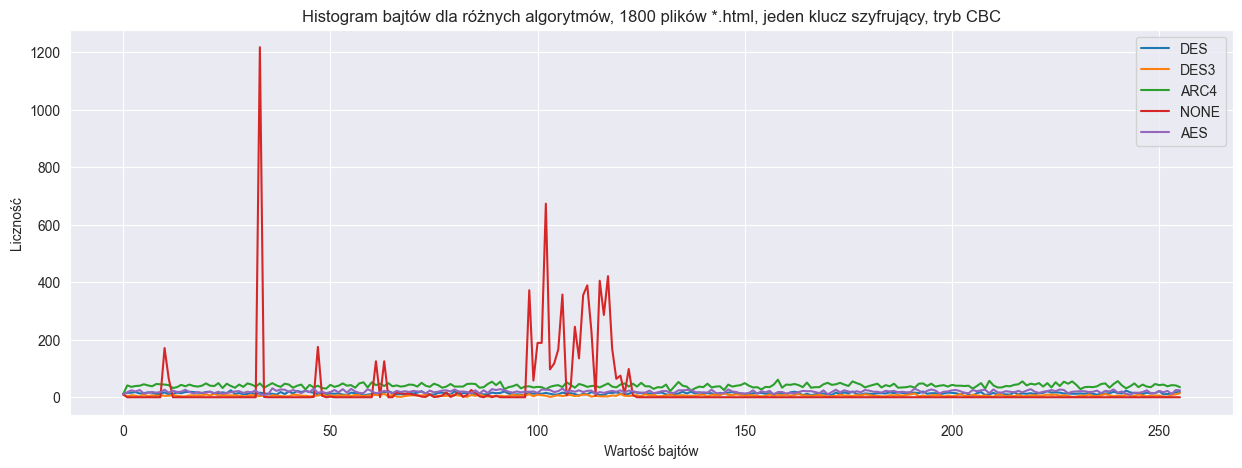

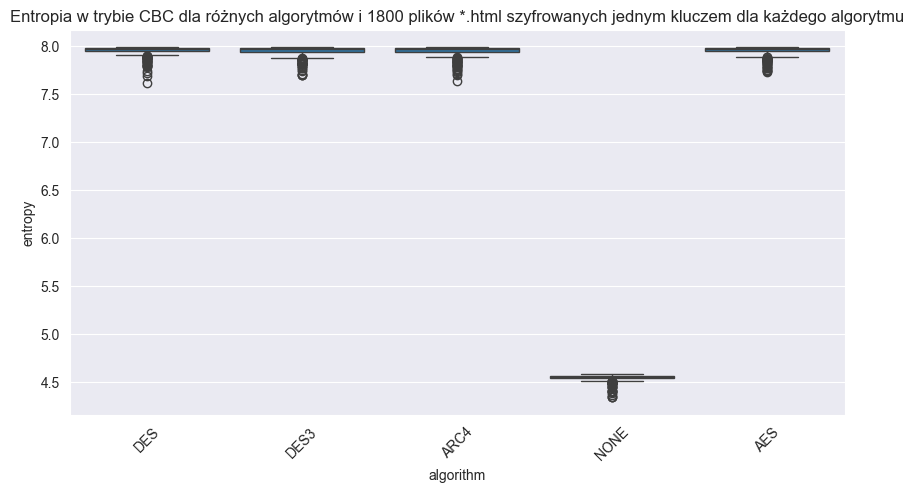

In [9]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_cbc_1800_1key["algorithm"].unique()):
    subset = df_html_cbc_1800_1key[df_html_cbc_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.html, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_cbc_1800_1key["algorithm"], y=df_html_cbc_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.html szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [10]:
df_pyth_cbc_1800_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_1key_csv/features_pyth_cbc.csv'))
df_pyth_cbc_1800_1key

file_name    format   entropy        mean     variance    std_dev  \
0     file0380.py.enc  pyth_cbc  7.975430  128.420646  5389.583310  73.413781   
1     file0666.py.enc  pyth_cbc  7.956038  129.482713  5503.419914  74.185038   
2     file0605.py.enc  pyth_cbc  7.976591  128.052661  5496.776672  74.140250   
3     file0705.py.enc  pyth_cbc  7.938930  127.600529  5368.043465  73.266933   
4     file0678.py.enc  pyth_cbc  7.956176  128.205517  5300.127991  72.801978   
...               ...       ...       ...         ...          ...        ...   
1795  file0075.py.enc  pyth_cbc  7.976111  126.907262  5509.136746  74.223559   
1796  file0108.py.enc  pyth_cbc  7.958325  126.090733  5360.224311  73.213553   
1797  file0008.py.enc  pyth_cbc  7.807063  127.509698  5526.105509  74.337780   
1798  file0116.py.enc  pyth_cbc  7.970421  127.512743  5427.611185  73.672323   
1799  file0016.py.enc  pyth_cbc  7.792697  127.487705  5396.729357  73.462435   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.025905 -1.184919  747957  10.249397  ...             23   
1    -0.014317 -1.202608  465286  10.154895  ...             14   
2    -0.008124 -1.226710  749250  10.298833  ...             27   
3    -0.004004 -1.174174  319718  10.282356  ...             13   
4    -0.010065 -1.170839  426765  10.298297  ...              9   
...        ...       ...     ...        ...  ...            ...   
1795  0.022145 -1.214023  940543  10.282340  ...             38   
1796  0.040282 -1.180032  487459  10.249674  ...             16   
1797 -0.012073 -1.215545   98561  10.305725  ...              6   
1798  0.013848 -1.198807  699418  10.300535  ...             31   
1799 -0.010901 -1.176912  104968  10.370592  ...              2   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                31             23             32             24   
1                21             19             19             25   
2                27             32             22             24   
3                10             15             14              7   
4                20             15             13             17   
...             ...            ...            ...            ...   
1795             31             38             34             34   
1796             19             25             20             16   
1797              2              1              6              5   
1798             30             28             19             20   
1799              0              5              5              0   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                29             30             30             30        DES  
1                21             16             20             19        DES  
2                24             31             32             25        DES  
3                 7             13             10             14        DES  
4                18             17             15              8        DES  
...             ...            ...            ...            ...        ...  
1795             32             31             38             42        AES  
1796             15             21             18             19        AES  
1797              5              4              4              5        AES  
1798             28             22             22             29        AES  
1799              2              4              5              7        AES  

[1800 rows x 267 columns]

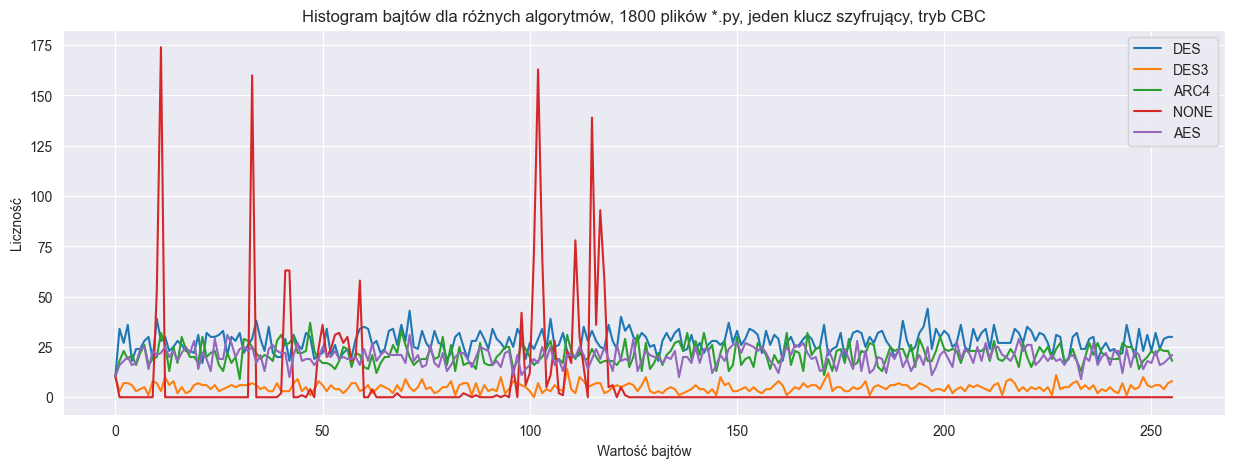

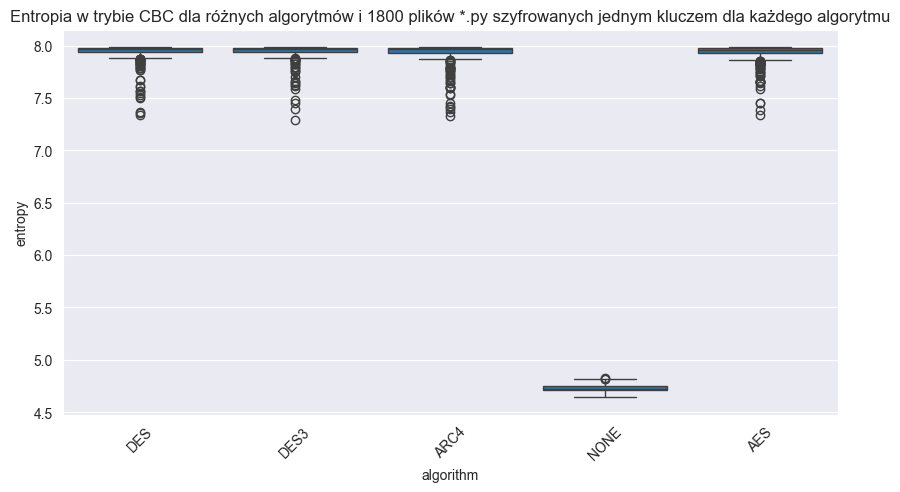

In [11]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_cbc_1800_1key["algorithm"].unique()):
    subset = df_pyth_cbc_1800_1key[df_pyth_cbc_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.py, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_cbc_1800_1key["algorithm"], y=df_pyth_cbc_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.py szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [5]:
df_txt_cbc_1800_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_1key_csv/features_txt_cbc.csv'))
df_txt_cbc_1800_1key

file_name   format   entropy        mean     variance    std_dev  \
0     file0712.txt.enc  txt_cbc  7.956041  128.619433  5447.769643  73.809008   
1     file0702.txt.enc  txt_cbc  7.963993  128.051995  5574.662619  74.663663   
2     file0474.txt.enc  txt_cbc  7.958446  125.453355  5434.076868  73.716191   
3     file0464.txt.enc  txt_cbc  7.938393  126.486496  5523.560759  74.320662   
4     file0416.txt.enc  txt_cbc  7.974929  129.335326  5542.012013  74.444691   
...                ...      ...       ...         ...          ...        ...   
1795  file0058.txt.enc  txt_cbc  7.886646  127.371822  5604.309842  74.861939   
1796  file0256.txt.enc  txt_cbc  7.980352  127.436025  5563.280163  74.587399   
1797  file0246.txt.enc  txt_cbc  7.975985  126.762147  5514.802525  74.261716   
1798  file0189.txt.enc  txt_cbc  7.959023  127.912846  5365.357240  73.248599   
1799  file0199.txt.enc  txt_cbc  7.873666  125.352941  5577.815138  74.684772   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.016727 -1.201694  423902  10.356768  ...             15   
1    -0.010173 -1.216147  494255  10.241720  ...             20   
2     0.029590 -1.189550  459663  10.277212  ...             11   
3     0.011613 -1.218967  306307  10.298640  ...             14   
4    -0.023873 -1.226084  782876  10.313536  ...             24   
...        ...       ...     ...        ...  ...            ...   
1795  0.008455 -1.183021  196018  10.189362  ...              6   
1796  0.008070 -1.225893  939882  10.325257  ...             43   
1797  0.020382 -1.211313  962392  10.308792  ...             35   
1798  0.005593 -1.186987  488935  10.282925  ...             21   
1799  0.051915 -1.244569  150622  10.523852  ...              4   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                20             17             23             20   
1                19             21             20             24   
2                14             13             13              9   
3                16              4             12              9   
4                33             29             36             30   
...             ...            ...            ...            ...   
1795              4              8             13             15   
1796             39             36             25             44   
1797             34             32             33             42   
1798             25             12             17             11   
1799              6              6              5              6   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                20             12             14             13        DES  
1                20             25             22             22        DES  
2                25             18             16             19        DES  
3                14              9             11              8        DES  
4                37             28             22             26        DES  
...             ...            ...            ...            ...        ...  
1795             13              7             11              9        AES  
1796             30             38             35             34        AES  
1797             30             46             46             41        AES  
1798             23             25             12             21        AES  
1799              7              8              2              3        AES  

[1800 rows x 267 columns]

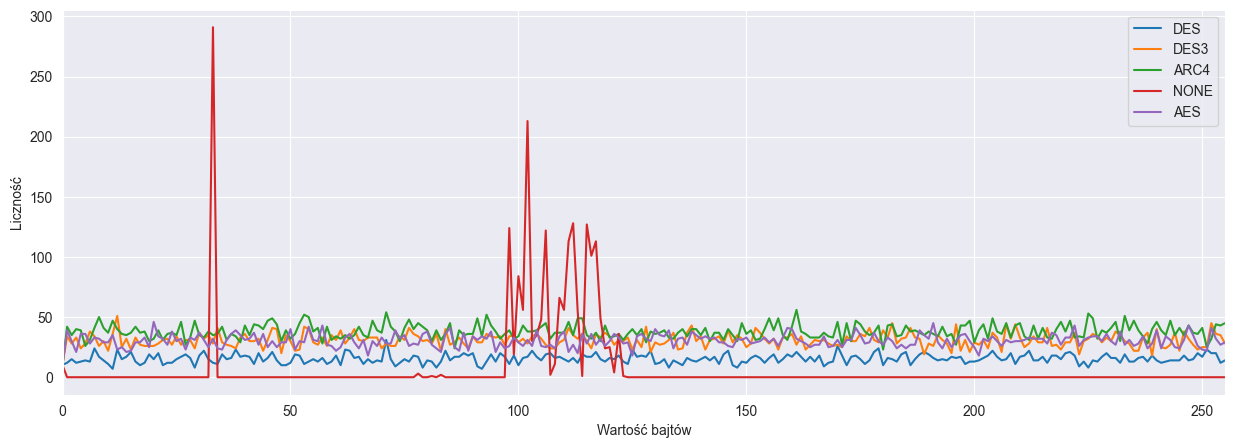

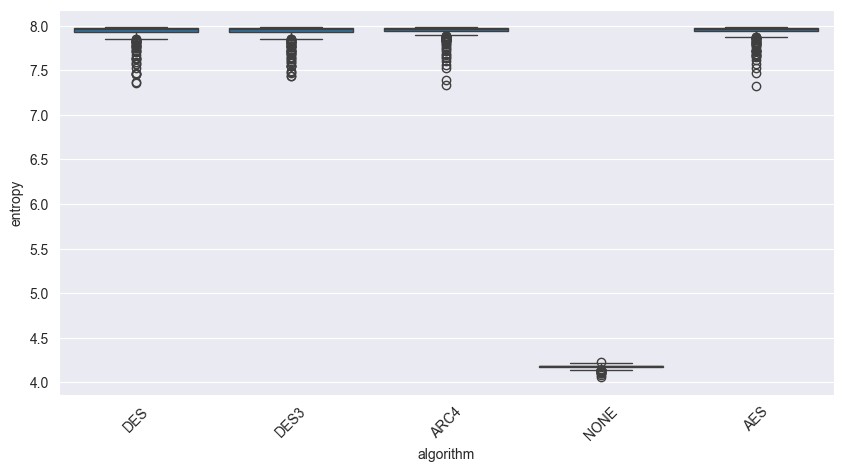

In [6]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_cbc_1800_1key["algorithm"].unique()):
    subset = df_txt_cbc_1800_1key[df_txt_cbc_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.xlim(0,255)
#plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.txt, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_cbc_1800_1key["algorithm"], y=df_txt_cbc_1800_1key["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.txt szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

algorithms = df_cbc_1800_1key["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_cbc_1800_1key[df_cbc_1800_1key["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
df_wav_cbc_1800_1key = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_1key_csv/features_wav_cbc.csv'))
df_wav_cbc_1800_1key

file_name   format   entropy        mean     variance    std_dev  \
0     file0580.wav.enc  wav_cbc  7.997889  127.607211  5468.263297  73.947707   
1     file0590.wav.enc  wav_cbc  7.998875  127.537103  5448.094081  73.811206   
2     file0441.wav.enc  wav_cbc  7.999466  127.418108  5453.455080  73.847512   
3     file0539.wav.enc  wav_cbc  7.999330  127.425530  5462.081737  73.905898   
4     file0451.wav.enc  wav_cbc  7.998956  127.578512  5451.100967  73.831572   
...                ...      ...       ...         ...          ...        ...   
1795  file0211.wav.enc  wav_cbc  7.997863  127.406029  5456.058076  73.865134   
1796  file0263.wav.enc  wav_cbc  7.998984  127.363712  5467.195146  73.940484   
1797  file0273.wav.enc  wav_cbc  7.997913  127.642004  5493.049234  74.115108   
1798  file0105.wav.enc  wav_cbc  7.998902  127.662537  5470.237499  73.961054   
1799  file0115.wav.enc  wav_cbc  7.997881  127.890316  5462.178970  73.906556   

      skewness  kurtosis    energy        rms  ...  histogram_247  \
0    -0.002469 -1.201385   9293814  10.261831  ...            349   
1    -0.000139 -1.196280  18553803  10.254117  ...            663   
2     0.002486 -1.198353  37297774  10.281174  ...           1403   
3     0.001893 -1.201043  27904141  10.268180  ...           1066   
4    -0.000878 -1.197856  18676516  10.287971  ...            646   
...        ...       ...       ...        ...  ...            ...   
1795 -0.000837 -1.201938   9345709  10.289509  ...            340   
1796  0.001781 -1.201880  18611208  10.269735  ...            692   
1797 -0.005772 -1.210319   9321275  10.276049  ...            344   
1798 -0.000526 -1.202652  18619030  10.271893  ...            738   
1799 -0.005362 -1.200432   9281724  10.254225  ...            350   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0               333            347            336            333   
1               669            725            684            692   
2              1339           1359           1323           1334   
3               955           1030            991           1072   
4               656            673            674            715   
...             ...            ...            ...            ...   
1795            329            338            312            311   
1796            718            687            665            701   
1797            338            349            346            346   
1798            696            688            670            657   
1799            357            357            338            357   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               362            339            344            336        DES  
1               675            693            701            735        DES  
2              1485           1454           1330           1386        DES  
3              1066           1029            992            990        DES  
4               724            720            680            670        DES  
...             ...            ...            ...            ...        ...  
1795            351            325            358            330        AES  
1796            679            690            679            659        AES  
1797            330            310            338            343        AES  
1798            727            679            706            670        AES  
1799            340            382            349            336        AES  

[1800 rows x 267 columns]

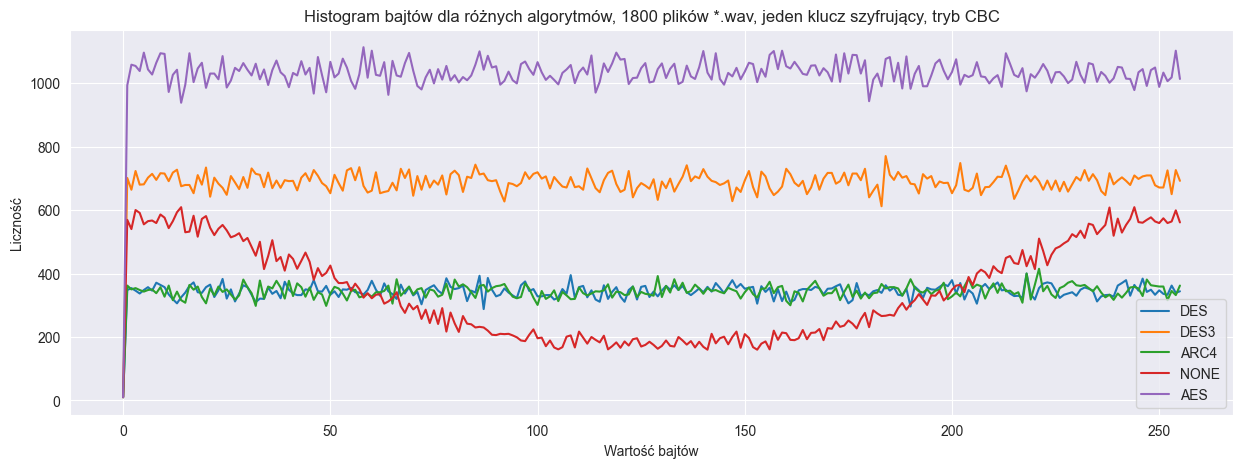

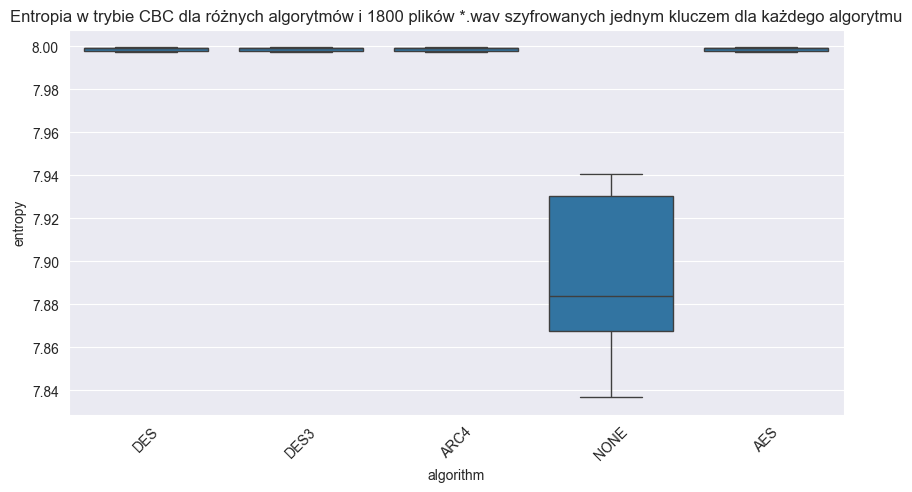

In [16]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_cbc_1800_1key["algorithm"].unique()):
    subset = df_wav_cbc_1800_1key[df_wav_cbc_1800_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.wav, jeden klucz szyfrujący, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_cbc_1800_1key["algorithm"], y=df_wav_cbc_1800_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.wav szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

Diagrams for 1000 files per format in ECB mode (3 keys per algorithm)

In [7]:
df_all_cbc_1800_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_3keys_csv/features_all.csv'))
df_all_cbc_1800_3keys

file_name    format   entropy        mean     variance  \
0         file0380.py.enc  pyth_cbc  7.974221  127.557725  5592.743578   
1         file0666.py.enc  pyth_cbc  7.953225  125.829787  5532.734769   
2         file0605.py.enc  pyth_cbc  7.972926  129.097537  5442.398895   
3         file0705.py.enc  pyth_cbc  7.931418  127.586640  5436.585086   
4         file0678.py.enc  pyth_cbc  7.956634  124.695328  5415.353000   
...                   ...       ...       ...         ...          ...   
10795  image_0083.bmp.enc   bmp_cbc  7.996640  127.290096  5494.906087   
10796  image_0234.bmp.enc   bmp_cbc  7.996610  127.025469  5484.040111   
10797  image_0224.bmp.enc   bmp_cbc  7.998067  127.729177  5456.770286   
10798  image_0152.bmp.enc   bmp_cbc  7.998584  127.747026  5466.126448   
10799  image_0142.bmp.enc   bmp_cbc  7.998954  127.254104  5460.639000   

         std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0      74.784648  0.003207 -1.220148    748959  10.256260  ...             31   
1      74.382355  0.055701 -1.219171    477558  10.287942  ...             16   
2      73.772616 -0.019102 -1.185199    745327  10.271836  ...             27   
3      73.733202  0.018238 -1.200743    324014  10.351207  ...             13   
4      73.589082  0.046369 -1.193314    428862  10.323567  ...              7   
...          ...       ...       ...       ...        ...  ...            ...   
10795  74.127634  0.006148 -1.211045   6354320  10.303403  ...            256   
10796  74.054305  0.005242 -1.205377   6158221  10.263214  ...            192   
10797  73.869955 -0.004794 -1.199894  10700065  10.288295  ...            352   
10798  73.933257 -0.004477 -1.200710  14019915  10.274807  ...            528   
10799  73.896137  0.003244 -1.199659  16686859  10.288809  ...            619   

       histogram_248  histogram_249  histogram_250  histogram_251  \
0                 31             31             31             29   
1                 22             16             22             22   
2                 27             30             29             39   
3                  9             18              6             10   
4                 18             14             16             11   
...              ...            ...            ...            ...   
10795            225            247            241            256   
10796            248            246            190            206   
10797            381            394            397            356   
10798            508            535            507            509   
10799            605            595            682            630   

       histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 24             34             27             31        DES  
1                 16             12             16             20        DES  
2                 36             27             26             30        DES  
3                 11             11             13             21        DES  
4                 13             11             17             15        DES  
...              ...            ...            ...            ...        ...  
10795            211            247            227            213        AES  
10796            237            237            249            221        AES  
10797            388            397            386            415        AES  
10798            524            504            554            501        AES  
10799            650            558            625            595        AES  

[10800 rows x 267 columns]

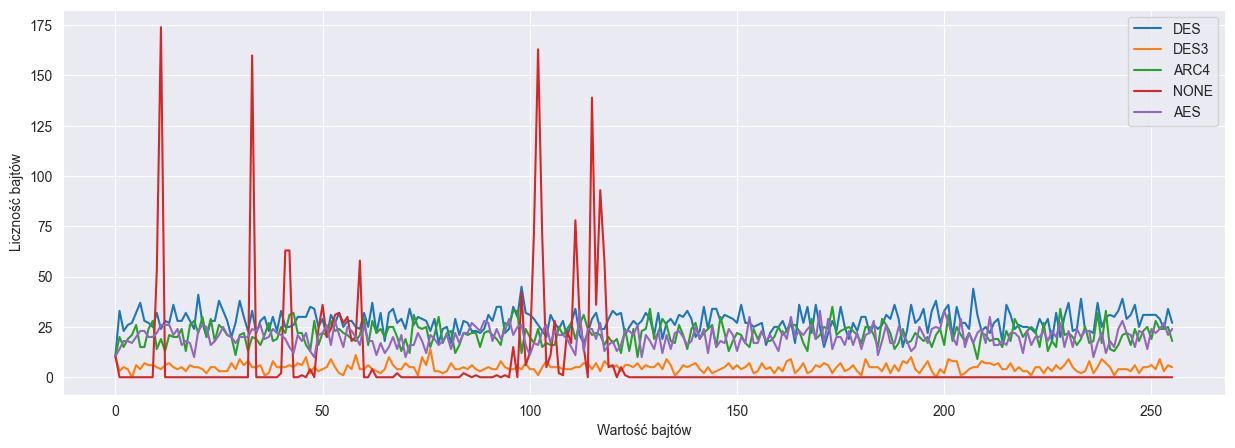

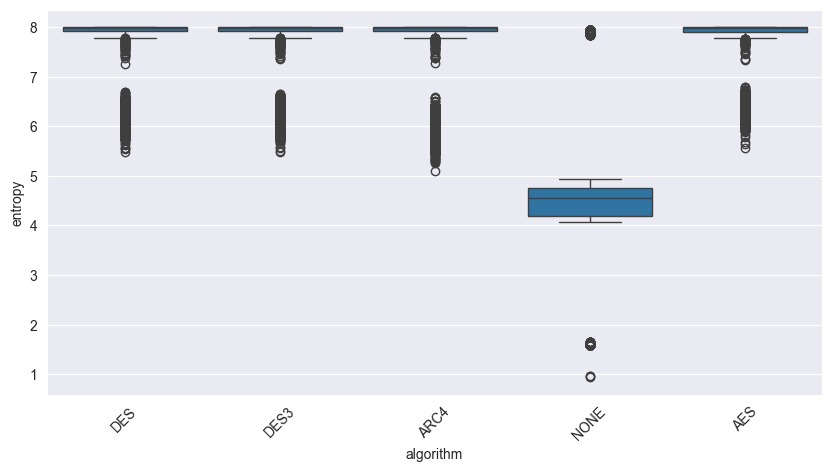

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_all_cbc_1800_3keys["algorithm"].unique()):
    subset = df_all_cbc_1800_3keys[df_all_cbc_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
#plt.title("Histogram bajtów dla różnych algorytmów i wszystkich formatów plików, 1800 plików na format, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność bajtów")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all_cbc_1800_3keys["algorithm"], y=df_all_cbc_1800_3keys["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie CBC dla różnych algorytmów i wszystkich formatów plików, 1800 plików na format, trzy klucze szyfrujące na algorytm")
plt.show()

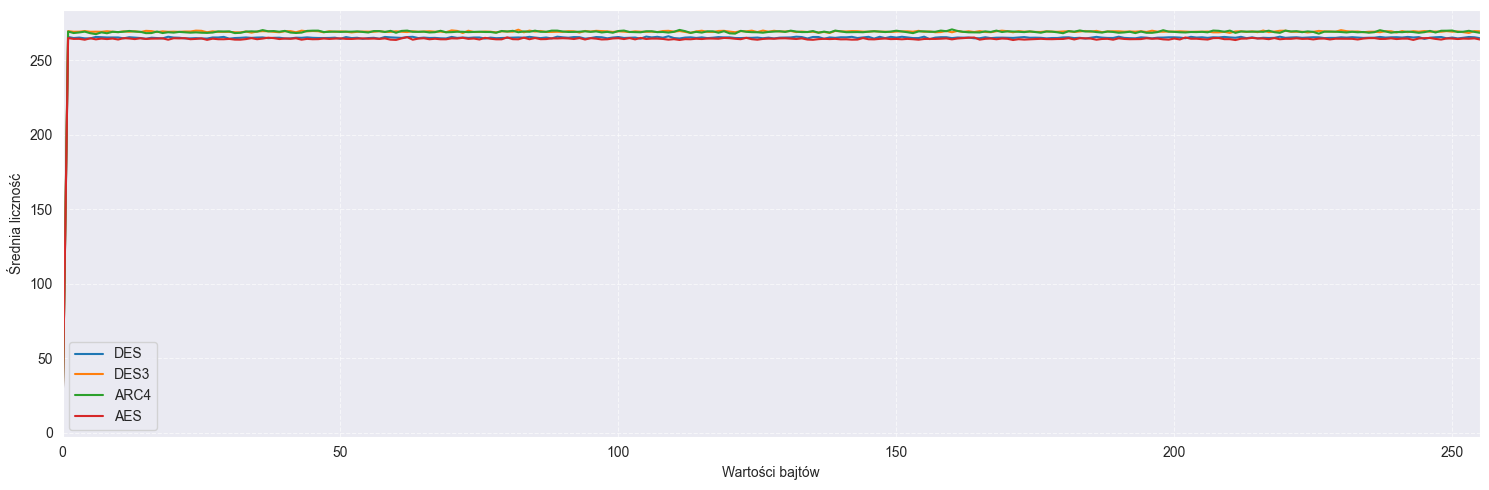

In [9]:
import matplotlib.pyplot as plt

algorithms = df_all_cbc_1800_3keys["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_all_cbc_1800_3keys[df_all_cbc_1800_3keys["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df_bmp_cbc_1800_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_3keys_csv/features_bmp_cbc.csv'))
df_bmp_cbc_1800_3keys

file_name   format   entropy        mean     variance  \
0     image_0416.bmp.enc  bmp_cbc  7.999273  127.390674  5464.931621   
1     image_0406.bmp.enc  bmp_cbc  7.999118  127.719187  5458.000831   
2     image_0608.bmp.enc  bmp_cbc  7.999308  127.338473  5453.136434   
3     image_0618.bmp.enc  bmp_cbc  7.999304  127.537308  5462.535921   
4     image_0382.bmp.enc  bmp_cbc  7.999188  127.614264  5467.466053   
...                  ...      ...       ...         ...          ...   
1795  image_0083.bmp.enc  bmp_cbc  7.996640  127.290096  5494.906087   
1796  image_0234.bmp.enc  bmp_cbc  7.996610  127.025469  5484.040111   
1797  image_0224.bmp.enc  bmp_cbc  7.998067  127.729177  5456.770286   
1798  image_0152.bmp.enc  bmp_cbc  7.998584  127.747026  5466.126448   
1799  image_0142.bmp.enc  bmp_cbc  7.998954  127.254104  5460.639000   

        std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0     73.925176  0.005254 -1.201634  28179008  10.271850  ...           1006   
1     73.878284 -0.003782 -1.198832  21090807  10.262106  ...            769   
2     73.845355  0.003098 -1.198430  29194684  10.277391  ...           1143   
3     73.908971 -0.000811 -1.201178  23421937  10.271155  ...            857   
4     73.942316  0.001544 -1.201547  21415946  10.274629  ...            822   
...         ...       ...       ...       ...        ...  ...            ...   
1795  74.127634  0.006148 -1.211045   6354320  10.303403  ...            256   
1796  74.054305  0.005242 -1.205377   6158221  10.263214  ...            192   
1797  73.869955 -0.004794 -1.199894  10700065  10.288295  ...            352   
1798  73.933257 -0.004477 -1.200710  14019915  10.274807  ...            528   
1799  73.896137  0.003244 -1.199659  16686859  10.288809  ...            619   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0              1017           1012           1073           1131   
1               781            778            837            791   
2              1047           1063           1070           1028   
3               861            870            842            849   
4               797            852            809            827   
...             ...            ...            ...            ...   
1795            225            247            241            256   
1796            248            246            190            206   
1797            381            394            397            356   
1798            508            535            507            509   
1799            605            595            682            630   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0              1047           1077           1078           1079        DES  
1               802            792            782            801        DES  
2              1090           1069           1043           1059        DES  
3               852            877            867            853        DES  
4               773            812            795            807        DES  
...             ...            ...            ...            ...        ...  
1795            211            247            227            213        AES  
1796            237            237            249            221        AES  
1797            388            397            386            415        AES  
1798            524            504            554            501        AES  
1799            650            558            625            595        AES  

[1800 rows x 267 columns]

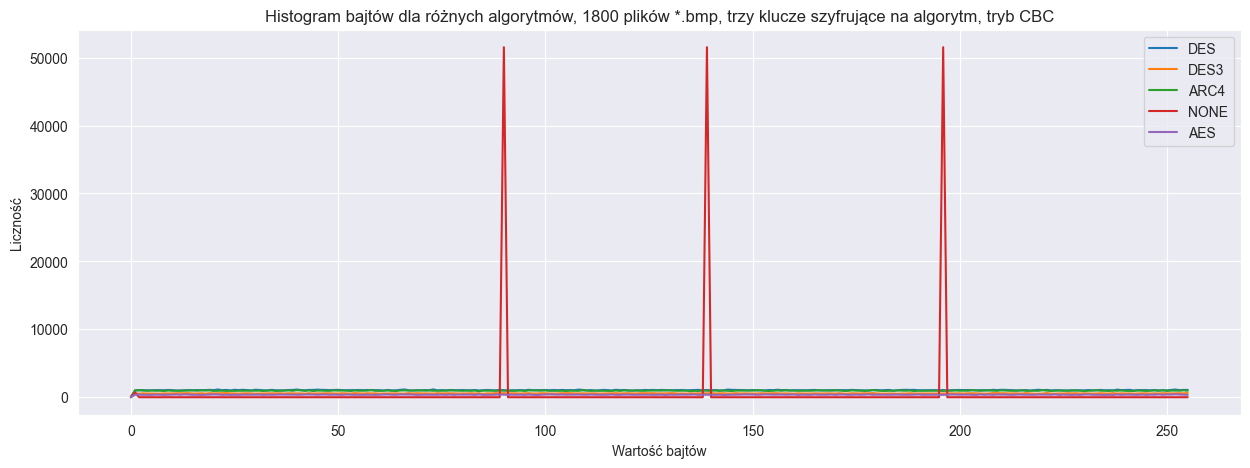

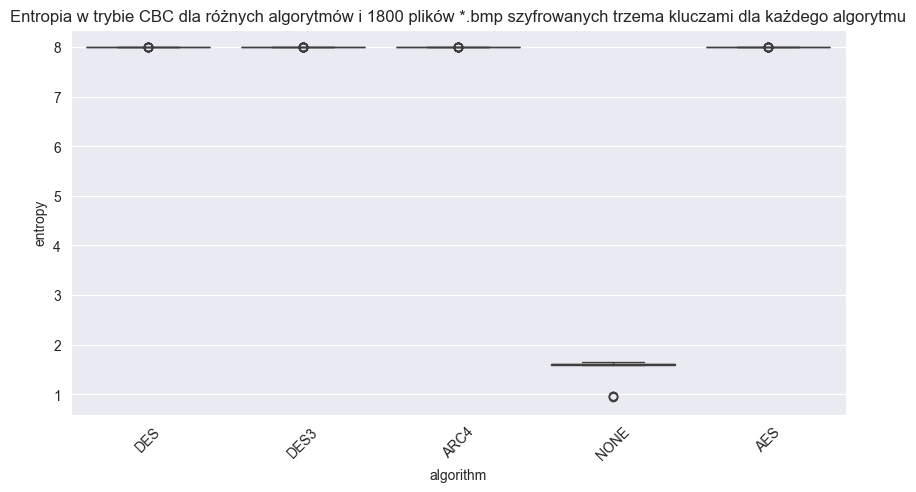

In [20]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_cbc_1800_3keys["algorithm"].unique()):
    subset = df_bmp_cbc_1800_3keys[df_bmp_cbc_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.bmp, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_cbc_1800_3keys["algorithm"], y=df_bmp_cbc_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.bmp szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [21]:
df_csv_cbc_1800_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_3keys_csv/features_csv_cbc.csv'))
df_csv_cbc_1800_3keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0715.csv.enc  csv_cbc  6.415061  128.958333  4950.973264  70.363153   
1     file0705.csv.enc  csv_cbc  5.864369  123.833333  5610.972222  74.906423   
2     file0473.csv.enc  csv_cbc  6.378230  125.528846  5518.499168  74.286602   
3     file0463.csv.enc  csv_cbc  5.812500  119.437500  5257.464844  72.508378   
4     file0385.csv.enc  csv_cbc  6.243615  133.836538  4894.502126  69.960718   
...                ...      ...       ...         ...          ...        ...   
1795  file0127.csv.enc  csv_cbc  6.071928  135.437500  5787.771094  76.077402   
1796  file0251.csv.enc  csv_cbc  6.037492  125.700000  5855.860000  76.523591   
1797  file0329.csv.enc  csv_cbc  6.096928  127.975000  5114.924375  71.518699   
1798  file0241.csv.enc  csv_cbc  6.541249  127.743056  5218.954813  72.242334   
1799  file0339.csv.enc  csv_cbc  6.247832  119.666667  4970.763889  70.503645   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0     0.081972 -1.196964   13107  10.451076  ...              1   
1     0.028443 -1.114594    7672  10.322575  ...              2   
2     0.014202 -1.231816   10591  10.091409  ...              0   
3     0.055712 -1.140392    6322   9.938876  ...              0   
4    -0.007580 -1.053873   10555  10.074244  ...              0   
...        ...       ...     ...        ...  ...            ...   
1795 -0.120827 -1.306571    8439  10.270711  ...              0   
1796  0.182840 -1.315673    9372  10.823585  ...              0   
1797  0.049818 -1.125465    8298  10.184547  ...              1   
1798 -0.133764 -1.078785   14515  10.039851  ...              0   
1799  0.088233 -1.186171   10516  10.466215  ...              0   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 1              0              0              0   
3                 1              0              0              0   
4                 0              0              0              1   
...             ...            ...            ...            ...   
1795              0              0              0              0   
1796              1              0              1              0   
1797              1              0              1              1   
1798              2              1              0              2   
1799              0              0              1              0   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 0              0              0              0        DES  
1                 0              2              0              1        DES  
2                 0              0              0              0        DES  
3                 0              0              1              0        DES  
4                 0              0              3              0        DES  
...             ...            ...            ...            ...        ...  
1795              0              1              1              0        AES  
1796              0              2              0              0        AES  
1797              1              0              0              0        AES  
1798              0              1              0              0        AES  
1799              0              0              0              0        AES  

[1800 rows x 267 columns]

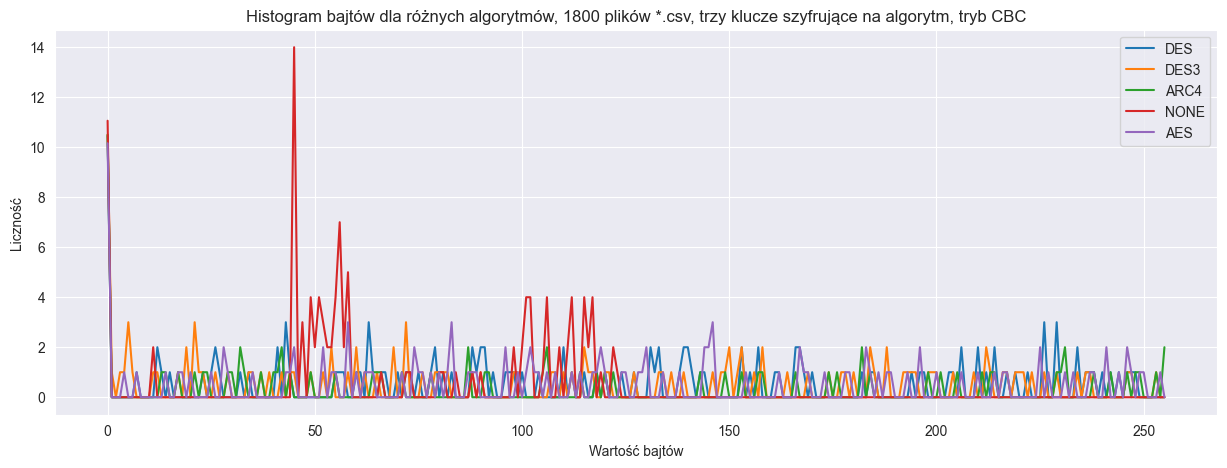

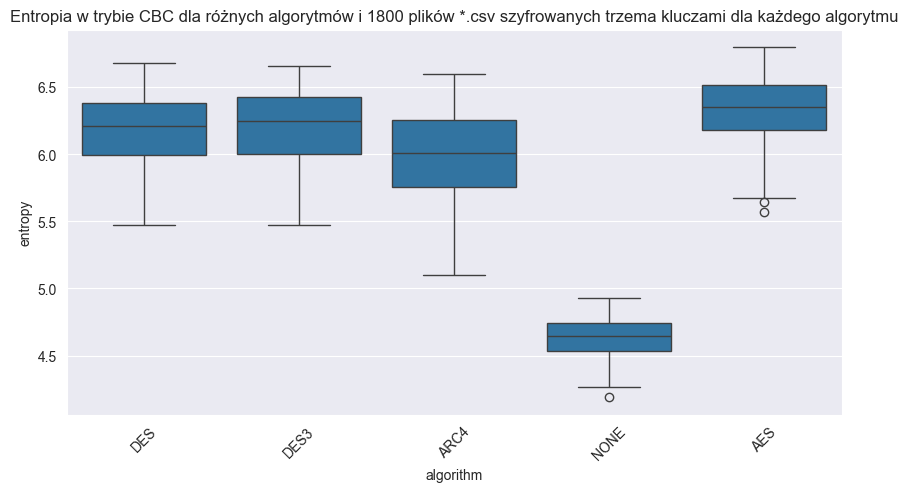

In [22]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_cbc_1800_3keys["algorithm"].unique()):
    subset = df_csv_cbc_1800_3keys[df_csv_cbc_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.csv, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_cbc_1800_3keys["algorithm"], y=df_csv_cbc_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.csv szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [23]:
df_html_cbc_1800_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_3keys_csv/features_html_cbc.csv'))
df_html_cbc_1800_3keys

file_name    format   entropy        mean     variance  \
0     file0674.html.enc  html_cbc  7.942749  127.665799  5504.202256   
1     file0412.html.enc  html_cbc  7.895602  128.975275  5445.195359   
2     file0413.html.enc  html_cbc  7.976484  127.318301  5497.662695   
3     file0675.html.enc  html_cbc  7.968968  126.103303  5487.918085   
4     file0588.html.enc  html_cbc  7.966598  128.777893  5471.087032   
...                 ...       ...       ...         ...          ...   
1795  file0296.html.enc  html_cbc  7.973076  126.248377  5546.422616   
1796  file0205.html.enc  html_cbc  7.949411  127.795956  5447.200400   
1797  file0063.html.enc  html_cbc  7.960503  129.385520  5411.304964   
1798  file0062.html.enc  html_cbc  7.968433  128.760143  5501.322839   
1799  file0204.html.enc  html_cbc  7.981579  127.802331  5491.606901   

        std_dev  skewness  kurtosis  energy        rms  ...  histogram_247  \
0     74.190311 -0.013848 -1.210377  363069  10.249619  ...             14   
1     73.791567 -0.022737 -1.228712  233072  10.330438  ...             10   
2     74.146225 -0.015889 -1.209311  961644  10.259569  ...             25   
3     74.080484  0.026059 -1.200845  647376  10.238225  ...             18   
4     73.966797 -0.016876 -1.204529  617476  10.310904  ...             22   
...         ...       ...       ...     ...        ...  ...            ...   
1795  74.474308  0.016585 -1.221413  782476  10.288559  ...             21   
1796  73.805152 -0.008195 -1.184667  342614  10.245366  ...             10   
1797  73.561573 -0.039220 -1.187744  507889  10.235359  ...             26   
1798  74.170903 -0.009794 -1.216775  713990  10.319985  ...             22   
1799  74.105377  0.006980 -1.208423  999794  10.291277  ...             31   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 6             11             22             10   
1                 7             10              8             10   
2                35             31             39             35   
3                25             30             13             21   
4                28             31             23             32   
...             ...            ...            ...            ...   
1795             29             31             26             24   
1796             12             15             14             13   
1797             25             23             21             18   
1798             29             27             26             26   
1799             41             35             45             34   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                17             13             11             11        DES  
1                 6              3             10              6        DES  
2                35             34             32             38        DES  
3                23             24             31             25        DES  
4                27             23             23             19        DES  
...             ...            ...            ...            ...        ...  
1795             32             22             18             34        AES  
1796             12             14             13             13        AES  
1797             14             16             21             16        AES  
1798             39             27             26             25        AES  
1799             32             38             46             43        AES  

[1800 rows x 267 columns]

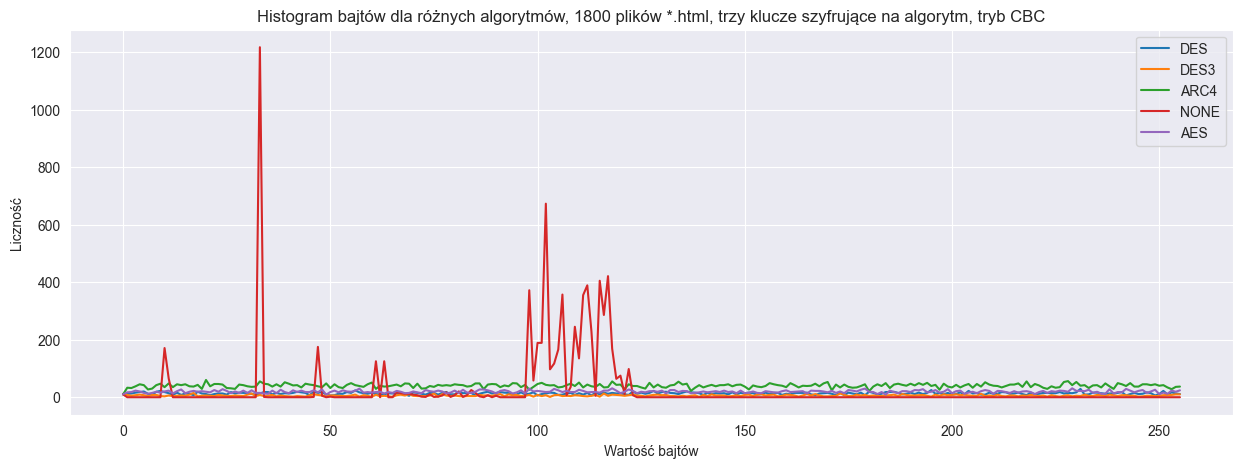

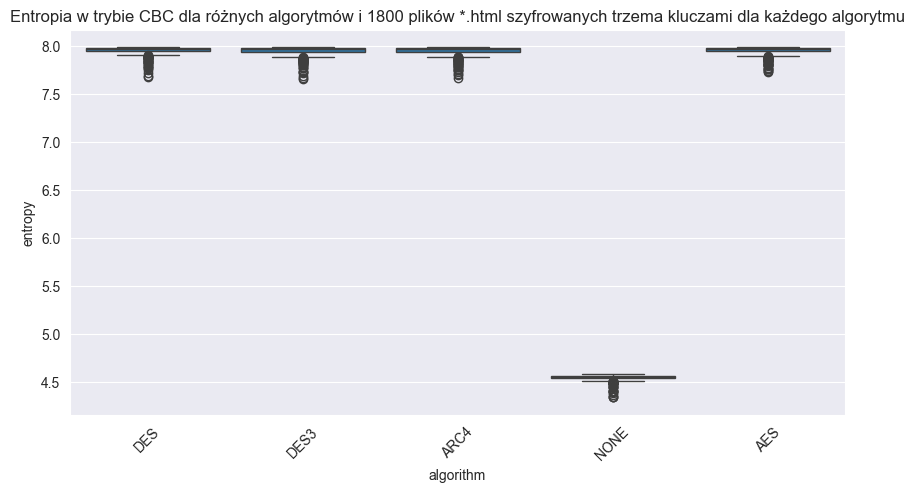

In [24]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_cbc_1800_3keys["algorithm"].unique()):
    subset = df_html_cbc_1800_3keys[df_html_cbc_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.html, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_cbc_1800_3keys["algorithm"], y=df_html_cbc_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.html szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [25]:
df_pyth_cbc_1800_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_3keys_csv/features_pyth_cbc.csv'))
df_pyth_cbc_1800_3keys

file_name    format   entropy        mean     variance    std_dev  \
0     file0380.py.enc  pyth_cbc  7.974221  127.557725  5592.743578  74.784648   
1     file0666.py.enc  pyth_cbc  7.953225  125.829787  5532.734769  74.382355   
2     file0605.py.enc  pyth_cbc  7.972926  129.097537  5442.398895  73.772616   
3     file0705.py.enc  pyth_cbc  7.931418  127.586640  5436.585086  73.733202   
4     file0678.py.enc  pyth_cbc  7.956634  124.695328  5415.353000  73.589082   
...               ...       ...       ...         ...          ...        ...   
1795  file0075.py.enc  pyth_cbc  7.980620  126.348696  5431.494643  73.698675   
1796  file0108.py.enc  pyth_cbc  7.966525  126.619397  5469.890055  73.958705   
1797  file0008.py.enc  pyth_cbc  7.788178  120.329741  5440.328771  73.758584   
1798  file0116.py.enc  pyth_cbc  7.971119  128.552640  5481.674110  74.038329   
1799  file0016.py.enc  pyth_cbc  7.794461  131.847336  5477.367063  74.009236   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0     0.003207 -1.220148  748959  10.256260  ...             31   
1     0.055701 -1.219171  477558  10.287942  ...             16   
2    -0.019102 -1.185199  745327  10.271836  ...             27   
3     0.018238 -1.200743  324014  10.351207  ...             13   
4     0.046369 -1.193314  428862  10.323567  ...              7   
...        ...       ...     ...        ...  ...            ...   
1795  0.019829 -1.197667  943154  10.296602  ...             32   
1796  0.009217 -1.198510  484942  10.223178  ...             13   
1797  0.126226 -1.166592   97910  10.271634  ...              2   
1798 -0.012683 -1.195083  687353  10.211307  ...             25   
1799 -0.069352 -1.209528  108005  10.519547  ...              5   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                31             31             31             29   
1                22             16             22             22   
2                27             30             29             39   
3                 9             18              6             10   
4                18             14             16             11   
...             ...            ...            ...            ...   
1795             42             27             26             33   
1796             18             19             17             21   
1797              4              5              1              1   
1798             21             25             37             28   
1799              4              7              4              4   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                24             34             27             31        DES  
1                16             12             16             20        DES  
2                36             27             26             30        DES  
3                11             11             13             21        DES  
4                13             11             17             15        DES  
...             ...            ...            ...            ...        ...  
1795             29             40             39             28        AES  
1796             29              9             19             16        AES  
1797              4              1              2              6        AES  
1798             24             31             26             31        AES  
1799              4              6              2              4        AES  

[1800 rows x 267 columns]

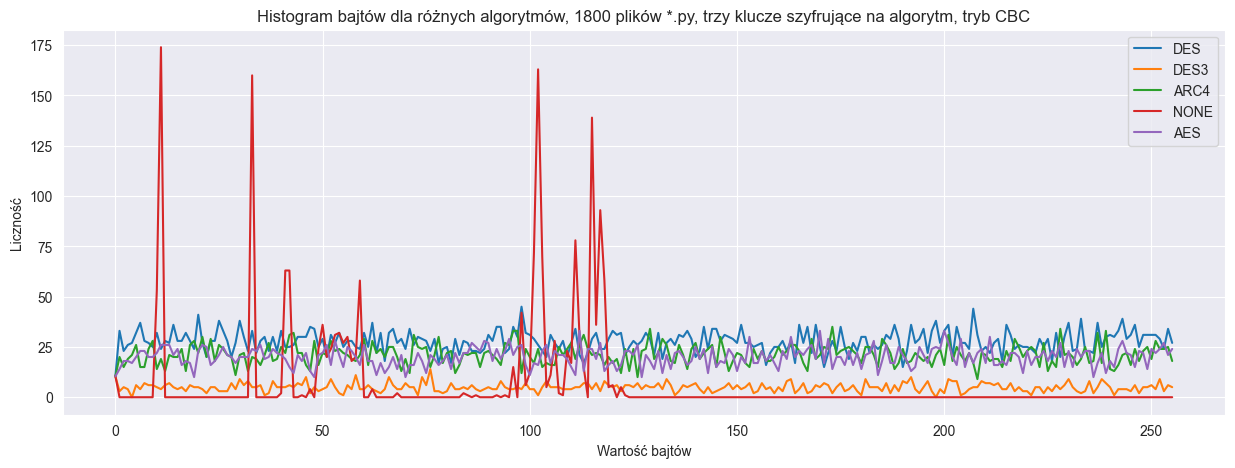

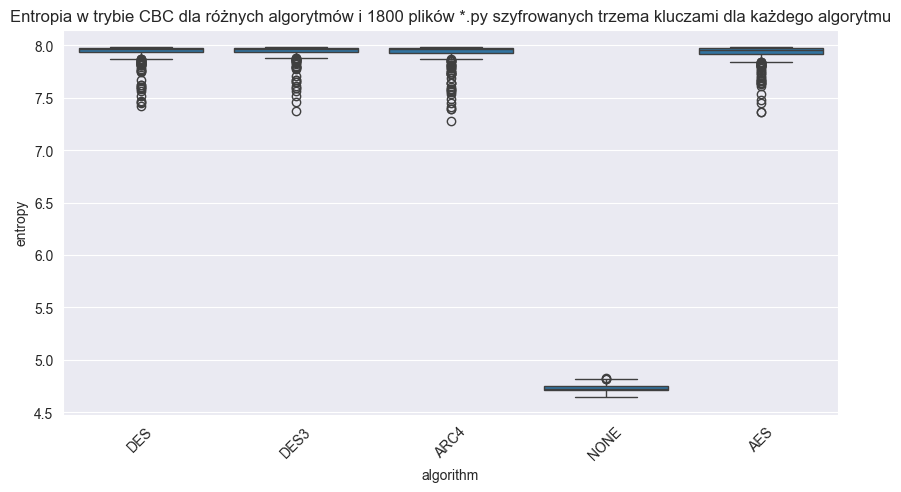

In [26]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_cbc_1800_3keys["algorithm"].unique()):
    subset = df_pyth_cbc_1800_3keys[df_pyth_cbc_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.py, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_cbc_1800_3keys["algorithm"], y=df_pyth_cbc_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.py szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [27]:
df_txt_cbc_1800_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_3keys_csv/features_txt_cbc.csv'))
df_txt_cbc_1800_3keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0712.txt.enc  txt_cbc  7.959664  126.892460  5416.169862  73.594632   
1     file0702.txt.enc  txt_cbc  7.960086  127.169567  5617.732919  74.951537   
2     file0474.txt.enc  txt_cbc  7.961252  126.290441  5265.228144  72.561892   
3     file0464.txt.enc  txt_cbc  7.944414  129.324446  5338.304361  73.063701   
4     file0416.txt.enc  txt_cbc  7.976436  127.430842  5409.642772  73.550274   
...                ...      ...       ...         ...          ...        ...   
1795  file0058.txt.enc  txt_cbc  7.904972  127.434852  5389.124993  73.410660   
1796  file0256.txt.enc  txt_cbc  7.979857  126.713249  5486.881022  74.073484   
1797  file0246.txt.enc  txt_cbc  7.978376  127.482553  5500.122708  74.162812   
1798  file0189.txt.enc  txt_cbc  7.952803  127.786548  5544.308461  74.460113   
1799  file0199.txt.enc  txt_cbc  7.853584  129.227206  5232.902054  72.338800   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0     0.015689 -1.196316  427023  10.394825  ...             14   
1     0.013996 -1.233859  490519  10.202939  ...             16   
2     0.008927 -1.155510  456592  10.242824  ...             12   
3    -0.023233 -1.169965  306825  10.307344  ...             11   
4    -0.002512 -1.193921  780939  10.300769  ...             26   
...        ...       ...     ...        ...  ...            ...   
1795 -0.037212 -1.190094  198951  10.265310  ...              7   
1796  0.015538 -1.202957  930428  10.273196  ...             32   
1797 -0.013914 -1.217437  951632  10.251002  ...             30   
1798 -0.026411 -1.216355  489957  10.293666  ...             15   
1799 -0.047902 -1.168259  145867  10.356406  ...              3   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                13             11             20             14   
1                21             21             23             19   
2                14             16             13             13   
3                 9             13             17             11   
4                32             27             35             22   
...             ...            ...            ...            ...   
1795              7              6              4             12   
1796             32             32             42             36   
1797             34             35             33             36   
1798             13             24             16             19   
1799              4              8              7              4   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                10             18             16             18        DES  
1                21             17             22             15        DES  
2                20             15             18             18        DES  
3                11             15              9             12        DES  
4                20             31             33             26        DES  
...             ...            ...            ...            ...        ...  
1795              5              3              2              7        AES  
1796             26             34             33             32        AES  
1797             49             36             32             39        AES  
1798             20             21             27             18        AES  
1799              2              4              1              5        AES  

[1800 rows x 267 columns]

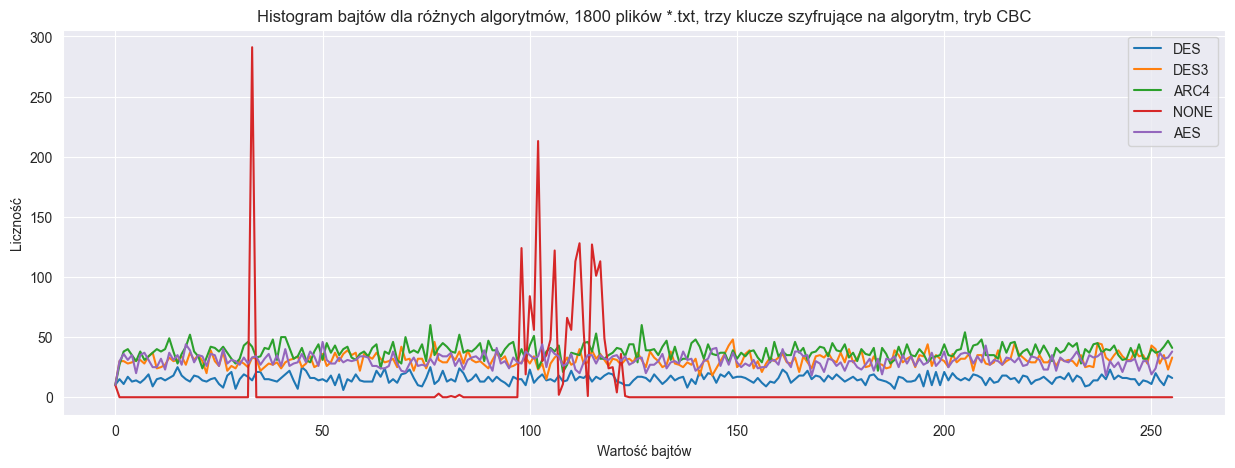

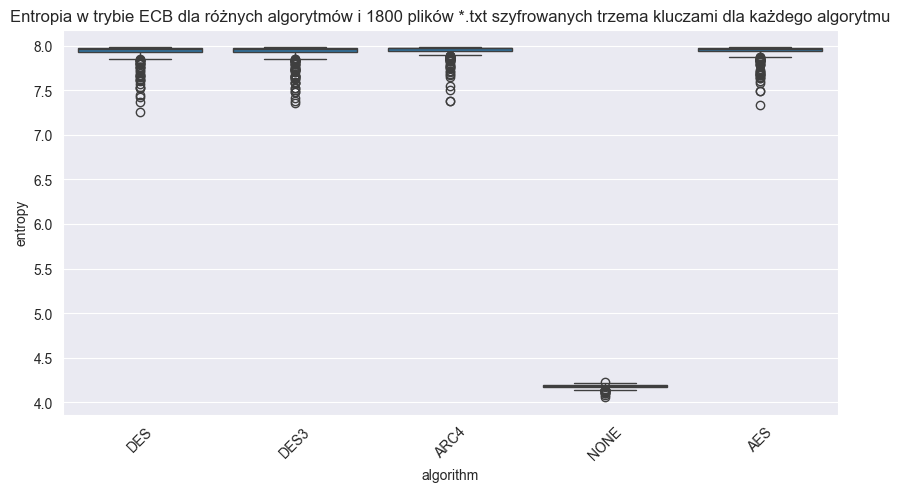

In [28]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_cbc_1800_3keys["algorithm"].unique()):
    subset = df_txt_cbc_1800_3keys[df_txt_cbc_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.txt, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_cbc_1800_3keys["algorithm"], y=df_txt_cbc_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.txt szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [29]:
df_wav_cbc_1800_3keys = pd.DataFrame(pd.read_csv('../features_cbc/features_cbc_1800/features_cbc_1800_3keys_csv/features_wav_cbc.csv'))
df_wav_cbc_1800_3keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0580.wav.enc  wav_cbc  7.998172  127.498731  5429.997551  73.688517   
1     file0590.wav.enc  wav_cbc  7.999105  127.498192  5472.034827  73.973203   
2     file0441.wav.enc  wav_cbc  7.999530  127.681663  5449.061445  73.817758   
3     file0539.wav.enc  wav_cbc  7.999381  127.498919  5477.169645  74.007903   
4     file0451.wav.enc  wav_cbc  7.998976  127.436199  5456.551637  73.868475   
...                ...      ...       ...         ...          ...        ...   
1795  file0211.wav.enc  wav_cbc  7.998141  127.463794  5438.517313  73.746304   
1796  file0263.wav.enc  wav_cbc  7.998800  127.701622  5445.774858  73.795493   
1797  file0273.wav.enc  wav_cbc  7.997885  127.310676  5478.602909  74.017585   
1798  file0105.wav.enc  wav_cbc  7.998890  127.388209  5447.146391  73.804786   
1799  file0115.wav.enc  wav_cbc  7.997979  127.558478  5470.099943  73.960124   

      skewness  kurtosis    energy        rms  ...  histogram_247  \
0    -0.003291 -1.196506   9326664  10.279951  ...            333   
1    -0.001778 -1.201681  18633619  10.276149  ...            695   
2    -0.003952 -1.197929  37180279  10.264967  ...           1406   
3     0.000017 -1.202633  27895044  10.266506  ...           1095   
4     0.001594 -1.198033  18632406  10.275814  ...            698   
...        ...       ...       ...        ...  ...            ...   
1795  0.005187 -1.198744   9310180  10.269932  ...            347   
1796 -0.003926 -1.195062  18705933  10.295836  ...            705   
1797  0.004259 -1.204724   9292188  10.260004  ...            350   
1798  0.003302 -1.198635  18567449  10.257654  ...            684   
1799  0.000741 -1.203125   9308942  10.269249  ...            344   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0               327            351            341            361   
1               704            677            684            690   
2              1329           1330           1332           1406   
3              1019           1036           1029           1007   
4               674            641            699            687   
...             ...            ...            ...            ...   
1795            338            350            333            371   
1796            684            687            706            698   
1797            366            404            342            353   
1798            682            761            736            705   
1799            340            354            331            330   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               338            323            324            313        DES  
1               666            681            666            666        DES  
2              1382           1315           1422           1338        DES  
3              1066           1030           1047           1075        DES  
4               677            701            673            721        DES  
...             ...            ...            ...            ...        ...  
1795            340            349            342            344        AES  
1796            688            709            643            648        AES  
1797            325            348            328            334        AES  
1798            704            722            674            648        AES  
1799            363            345            314            332        AES  

[1800 rows x 267 columns]

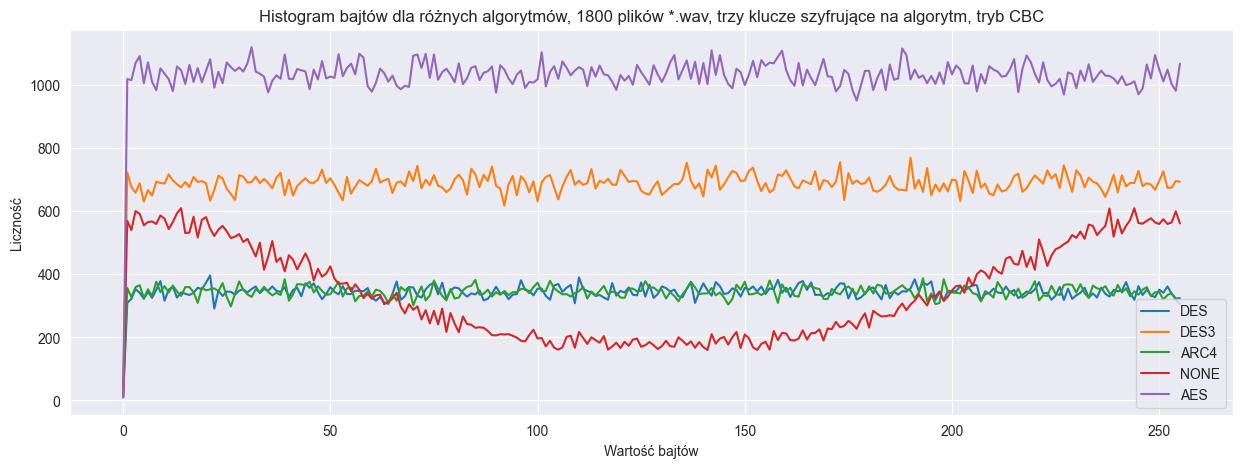

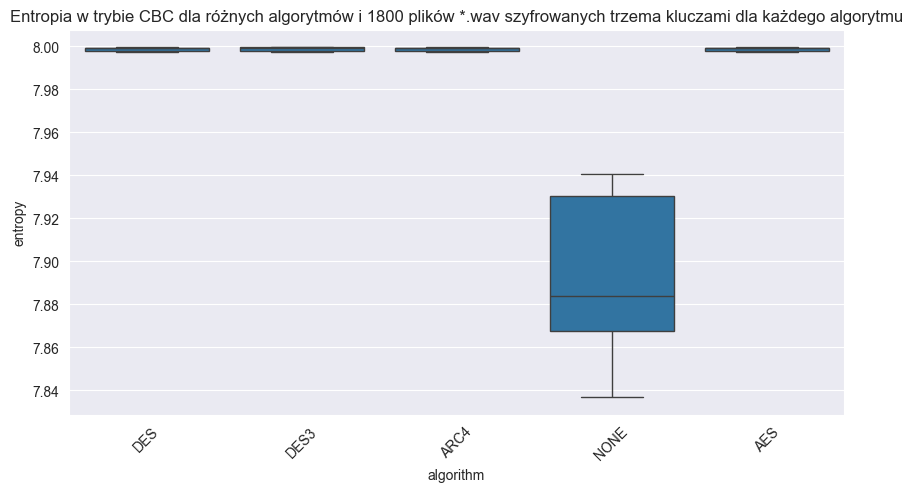

In [30]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_cbc_1800_3keys["algorithm"].unique()):
    subset = df_wav_cbc_1800_3keys[df_wav_cbc_1800_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.wav, trzy klucze szyfrujące na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_cbc_1800_3keys["algorithm"], y=df_wav_cbc_1800_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.wav szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

Diagrams for 1000 files per format in ECB mode (6 keys per algorithm)

In [10]:
df_all_cbc_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1800/features_cbc_1800_6keys_csv/features_all.csv'))
df_all_cbc_1800_6keys


file_name    format   entropy        mean     variance  \
0         file0380.py.enc  pyth_cbc  7.971530  128.588764  5498.892121   
1         file0666.py.enc  pyth_cbc  7.956870  128.366135  5542.260006   
2         file0605.py.enc  pyth_cbc  7.970197  128.708097  5445.534555   
3         file0705.py.enc  pyth_cbc  7.932306  129.303571  5613.891971   
4         file0678.py.enc  pyth_cbc  7.946145  128.495775  5290.799684   
...                   ...       ...       ...         ...          ...   
10795  image_0083.bmp.enc   bmp_cbc  7.997147  127.216737  5433.157299   
10796  image_0234.bmp.enc   bmp_cbc  7.996791  127.232365  5466.171222   
10797  image_0224.bmp.enc   bmp_cbc  7.997801  127.137474  5465.564978   
10798  image_0152.bmp.enc   bmp_cbc  7.998624  127.890776  5469.060020   
10799  image_0142.bmp.enc   bmp_cbc  7.998910  127.459564  5463.186575   

         std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0      74.154515 -0.015852 -1.199617    760212  10.333022  ...             30   
1      74.446357 -0.045058 -1.215967    469426  10.199973  ...             15   
2      73.793865 -0.033244 -1.199168    757134  10.352876  ...             29   
3      74.925910 -0.034414 -1.235022    319532  10.279365  ...             13   
4      72.737883 -0.004960 -1.163643    422815  10.250527  ...             12   
...          ...       ...       ...       ...        ...  ...            ...   
10795  73.709954  0.004285 -1.191868   6350729  10.300491  ...            235   
10796  73.933560  0.004697 -1.196802   6142061  10.249739  ...            223   
10797  73.929459  0.003575 -1.205555  10711229  10.293661  ...            433   
10798  73.953093 -0.007399 -1.205690  14041619  10.282757  ...            499   
10799  73.913372  0.002821 -1.200864  16630266  10.271347  ...            650   

       histogram_248  histogram_249  histogram_250  histogram_251  \
0                 29             29             37             30   
1                 17             26             15             12   
2                 15             31             33             30   
3                 14             12             12             14   
4                 16             12             10             24   
...              ...            ...            ...            ...   
10795            243            236            227            226   
10796            221            243            236            242   
10797            377            377            390            381   
10798            522            531            536            484   
10799            625            625            606            661   

       histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 33             32             33             35        DES  
1                 18             14             20             16        DES  
2                 31             21             26             24        DES  
3                 18              7             11             15        DES  
4                 20             19             16             20        DES  
...              ...            ...            ...            ...        ...  
10795            243            227            220            193        AES  
10796            236            225            226            238        AES  
10797            356            383            389            357        AES  
10798            542            520            540            486        AES  
10799            637            650            589            619        AES  

[10800 rows x 267 columns]

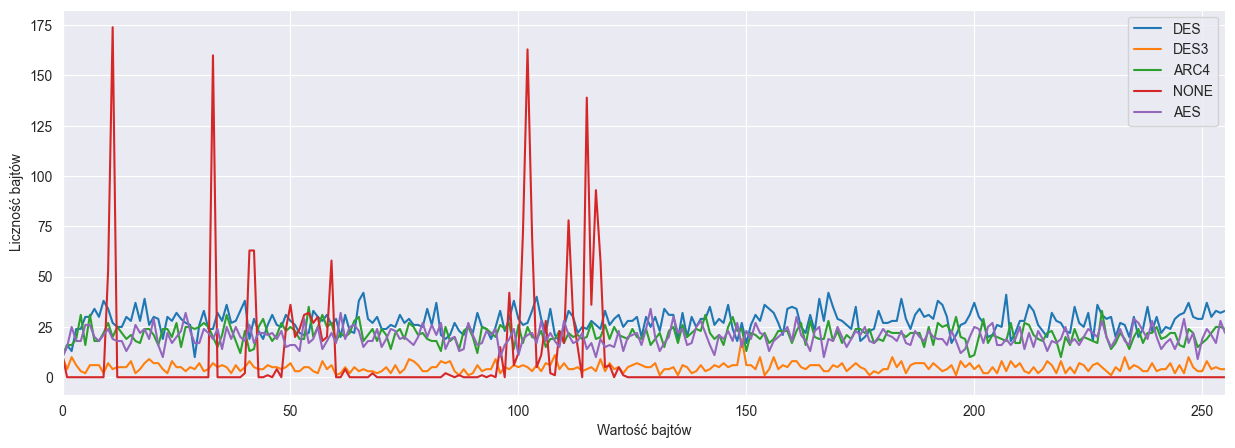

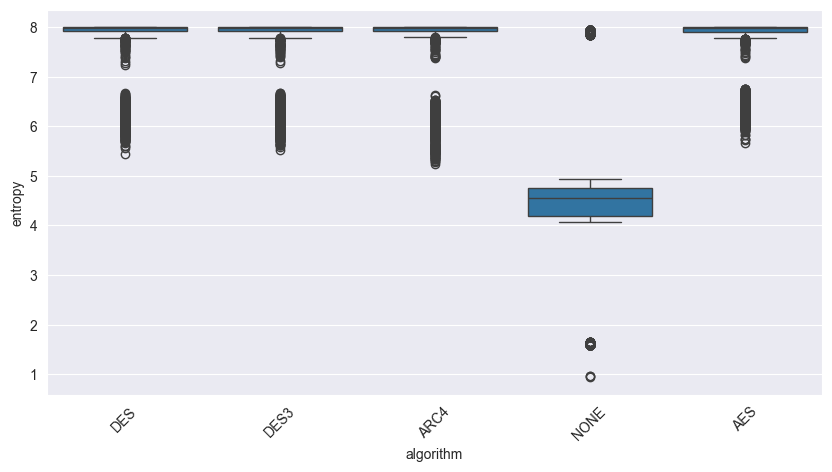

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_all_cbc_1800_6keys["algorithm"].unique()):
    subset = df_all_cbc_1800_6keys[df_all_cbc_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.xlim(0,255)
#plt.title(
    #"Histogram bajtów dla różnych algorytmów i wszystkich formatów plików, 1800 plików na format, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność bajtów")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all_cbc_1800_6keys["algorithm"], y=df_all_cbc_1800_6keys["entropy"])
plt.xticks(rotation=45)
#plt.title(
    #"Entropia w trybie CBC dla różnych algorytmów i wszystkich formatów plików, 1800 plików na format, sześć kluczy szyfrujących na algorytm")
plt.show()

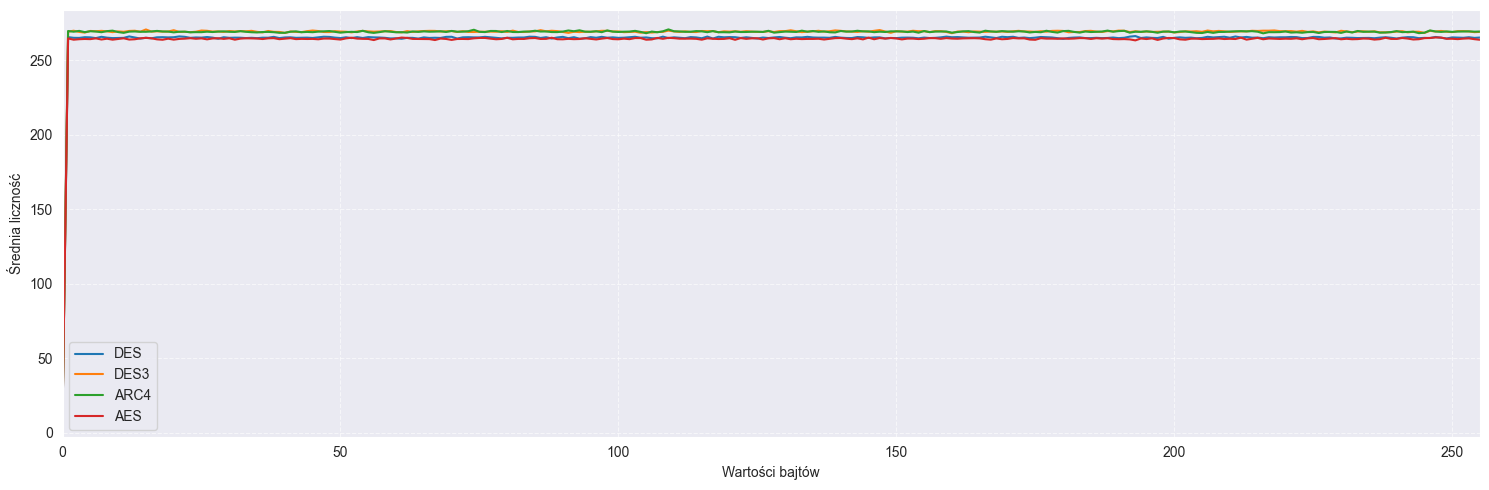

In [13]:
import matplotlib.pyplot as plt

algorithms = df_all_cbc_1800_6keys["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_all_cbc_1800_6keys[df_all_cbc_1800_6keys["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
df_bmp_cbc_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1800/features_cbc_1800_6keys_csv/features_bmp_cbc.csv'))
df_bmp_cbc_1800_6keys

file_name   format   entropy        mean     variance  \
0     image_0416.bmp.enc  bmp_cbc  7.999257  127.868066  5463.315515   
1     image_0406.bmp.enc  bmp_cbc  7.999118  127.675242  5464.423253   
2     image_0608.bmp.enc  bmp_cbc  7.999175  127.234736  5449.146277   
3     image_0618.bmp.enc  bmp_cbc  7.999043  127.413461  5458.021068   
4     image_0382.bmp.enc  bmp_cbc  7.999253  127.433606  5466.003045   
...                  ...      ...       ...         ...          ...   
1795  image_0083.bmp.enc  bmp_cbc  7.997147  127.216737  5433.157299   
1796  image_0234.bmp.enc  bmp_cbc  7.996791  127.232365  5466.171222   
1797  image_0224.bmp.enc  bmp_cbc  7.997801  127.137474  5465.564978   
1798  image_0152.bmp.enc  bmp_cbc  7.998624  127.890776  5469.060020   
1799  image_0142.bmp.enc  bmp_cbc  7.998910  127.459564  5463.186575   

        std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0     73.914244 -0.006608 -1.200556  28248082  10.284432  ...           1063   
1     73.921737 -0.001056 -1.201595  21149216  10.276306  ...            786   
2     73.818333  0.002688 -1.198922  29175147  10.273951  ...           1114   
3     73.878421  0.002640 -1.198645  23443489  10.275879  ...            849   
4     73.932422  0.003521 -1.199478  21397761  10.270266  ...            792   
...         ...       ...       ...       ...        ...  ...            ...   
1795  73.709954  0.004285 -1.191868   6350729  10.300491  ...            235   
1796  73.933560  0.004697 -1.196802   6142061  10.249739  ...            223   
1797  73.929459  0.003575 -1.205555  10711229  10.293661  ...            433   
1798  73.953093 -0.007399 -1.205690  14041619  10.282757  ...            499   
1799  73.913372  0.002821 -1.200864  16630266  10.271347  ...            650   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0              1091           1087           1034           1036   
1               816            778            793            798   
2              1074           1016            971           1068   
3               845            908            882            867   
4               863            771            820            791   
...             ...            ...            ...            ...   
1795            243            236            227            226   
1796            221            243            236            242   
1797            377            377            390            381   
1798            522            531            536            484   
1799            625            625            606            661   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0              1070           1050           1040           1056        DES  
1               793            760            861            820        DES  
2              1062           1113           1005           1033        DES  
3               887            888            864            851        DES  
4               766            812            795            786        DES  
...             ...            ...            ...            ...        ...  
1795            243            227            220            193        AES  
1796            236            225            226            238        AES  
1797            356            383            389            357        AES  
1798            542            520            540            486        AES  
1799            637            650            589            619        AES  

[1800 rows x 267 columns]

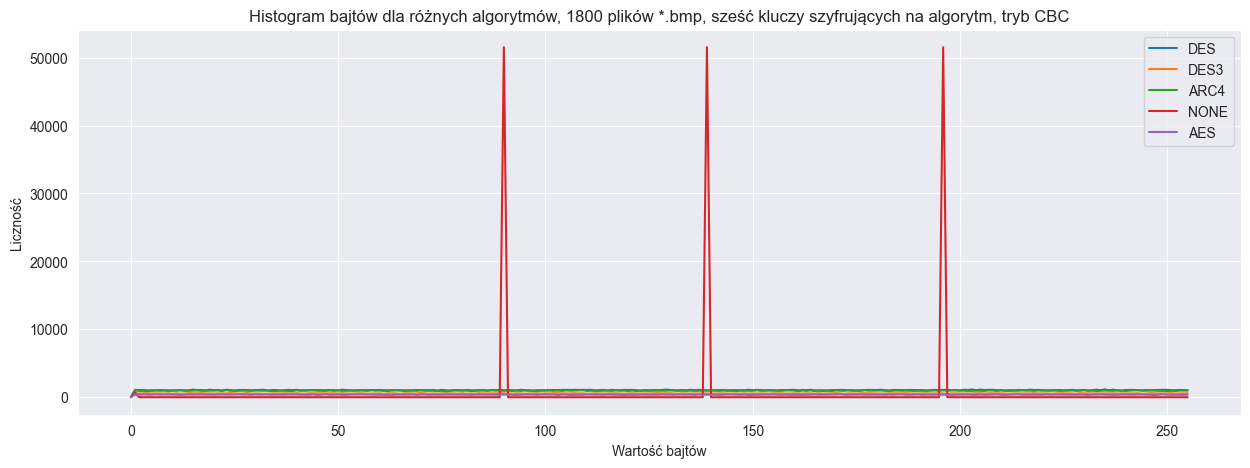

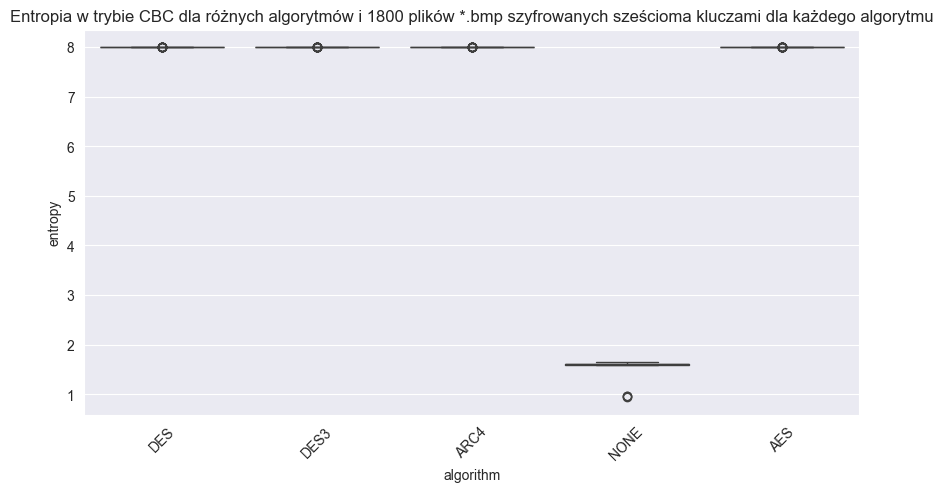

In [34]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_cbc_1800_6keys["algorithm"].unique()):
    subset = df_bmp_cbc_1800_6keys[df_bmp_cbc_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.bmp, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_cbc_1800_6keys["algorithm"], y=df_bmp_cbc_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.bmp szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [35]:
df_csv_cbc_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1800/features_cbc_1800_6keys_csv/features_csv_cbc.csv'))
df_csv_cbc_1800_6keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0715.csv.enc  csv_cbc  6.506891  123.408333  5828.758264  76.346305   
1     file0705.csv.enc  csv_cbc  5.975481  113.250000  4716.631944  68.677740   
2     file0473.csv.enc  csv_cbc  6.351741  125.509615  5784.769138  76.057670   
3     file0463.csv.enc  csv_cbc  5.788910  125.078125  4681.072021  68.418360   
4     file0385.csv.enc  csv_cbc  6.450440  127.634615  5688.693417  75.423428   
...                ...      ...       ...         ...          ...        ...   
1795  file0127.csv.enc  csv_cbc  5.912492  117.612500  5448.362344  73.813023   
1796  file0251.csv.enc  csv_cbc  5.946928  114.512500  4522.549844  67.249906   
1797  file0329.csv.enc  csv_cbc  6.196928  113.787500  5005.592344  70.750211   
1798  file0241.csv.enc  csv_cbc  6.742774  121.583333  5470.215278  73.960904   
1799  file0339.csv.enc  csv_cbc  6.152569  124.750000  5075.687500  71.243859   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0     0.017202 -1.345216   14877  11.134406  ...              1   
1     0.191761 -1.029997    8638  10.953183  ...              0   
2    -0.009749 -1.163923   10645  10.117103  ...              0   
3    -0.077468 -0.965839    7271  10.658770  ...              0   
4    -0.001421 -1.179916   10006   9.808748  ...              1   
...        ...       ...     ...        ...  ...            ...   
1795  0.261545 -1.152073    9045  10.633085  ...              0   
1796  0.050929 -1.224489    8741  10.452870  ...              0   
1797  0.299750 -0.961945    7775   9.858372  ...              0   
1798  0.091604 -1.205379   14376   9.991663  ...              1   
1799 -0.020140 -1.072565    9560   9.979145  ...              0   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 1              0              0              1   
3                 0              0              0              0   
4                 2              1              1              1   
...             ...            ...            ...            ...   
1795              0              0              0              1   
1796              0              1              0              0   
1797              0              0              1              0   
1798              0              0              1              0   
1799              1              1              2              2   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 0              0              1              0        DES  
1                 0              0              0              0        DES  
2                 0              1              0              0        DES  
3                 0              1              0              0        DES  
4                 0              0              0              1        DES  
...             ...            ...            ...            ...        ...  
1795              0              0              0              2        AES  
1796              0              0              0              0        AES  
1797              1              0              0              1        AES  
1798              0              2              0              2        AES  
1799              0              0              0              0        AES  

[1800 rows x 267 columns]

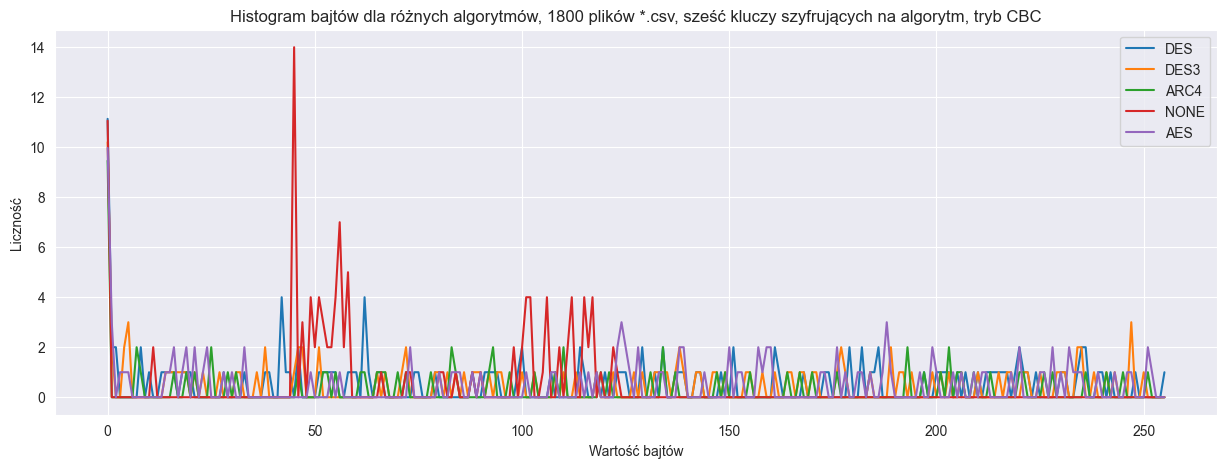

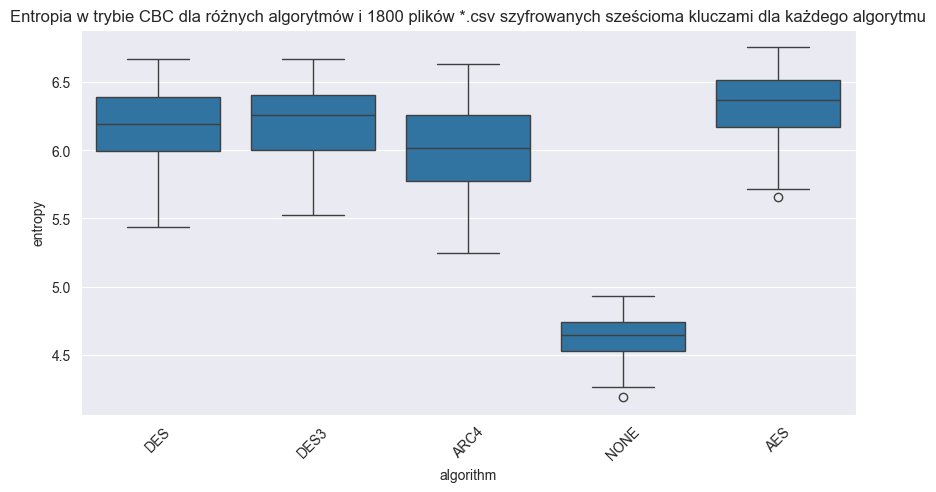

In [36]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_cbc_1800_6keys["algorithm"].unique()):
    subset = df_csv_cbc_1800_6keys[df_csv_cbc_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.csv, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_cbc_1800_6keys["algorithm"], y=df_csv_cbc_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.csv szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [37]:
df_html_cbc_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1800/features_cbc_1800_6keys_csv/features_html_cbc.csv'))
df_csv_cbc_1800_6keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0715.csv.enc  csv_cbc  6.506891  123.408333  5828.758264  76.346305   
1     file0705.csv.enc  csv_cbc  5.975481  113.250000  4716.631944  68.677740   
2     file0473.csv.enc  csv_cbc  6.351741  125.509615  5784.769138  76.057670   
3     file0463.csv.enc  csv_cbc  5.788910  125.078125  4681.072021  68.418360   
4     file0385.csv.enc  csv_cbc  6.450440  127.634615  5688.693417  75.423428   
...                ...      ...       ...         ...          ...        ...   
1795  file0127.csv.enc  csv_cbc  5.912492  117.612500  5448.362344  73.813023   
1796  file0251.csv.enc  csv_cbc  5.946928  114.512500  4522.549844  67.249906   
1797  file0329.csv.enc  csv_cbc  6.196928  113.787500  5005.592344  70.750211   
1798  file0241.csv.enc  csv_cbc  6.742774  121.583333  5470.215278  73.960904   
1799  file0339.csv.enc  csv_cbc  6.152569  124.750000  5075.687500  71.243859   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0     0.017202 -1.345216   14877  11.134406  ...              1   
1     0.191761 -1.029997    8638  10.953183  ...              0   
2    -0.009749 -1.163923   10645  10.117103  ...              0   
3    -0.077468 -0.965839    7271  10.658770  ...              0   
4    -0.001421 -1.179916   10006   9.808748  ...              1   
...        ...       ...     ...        ...  ...            ...   
1795  0.261545 -1.152073    9045  10.633085  ...              0   
1796  0.050929 -1.224489    8741  10.452870  ...              0   
1797  0.299750 -0.961945    7775   9.858372  ...              0   
1798  0.091604 -1.205379   14376   9.991663  ...              1   
1799 -0.020140 -1.072565    9560   9.979145  ...              0   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 1              0              0              1   
3                 0              0              0              0   
4                 2              1              1              1   
...             ...            ...            ...            ...   
1795              0              0              0              1   
1796              0              1              0              0   
1797              0              0              1              0   
1798              0              0              1              0   
1799              1              1              2              2   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                 0              0              1              0        DES  
1                 0              0              0              0        DES  
2                 0              1              0              0        DES  
3                 0              1              0              0        DES  
4                 0              0              0              1        DES  
...             ...            ...            ...            ...        ...  
1795              0              0              0              2        AES  
1796              0              0              0              0        AES  
1797              1              0              0              1        AES  
1798              0              2              0              2        AES  
1799              0              0              0              0        AES  

[1800 rows x 267 columns]

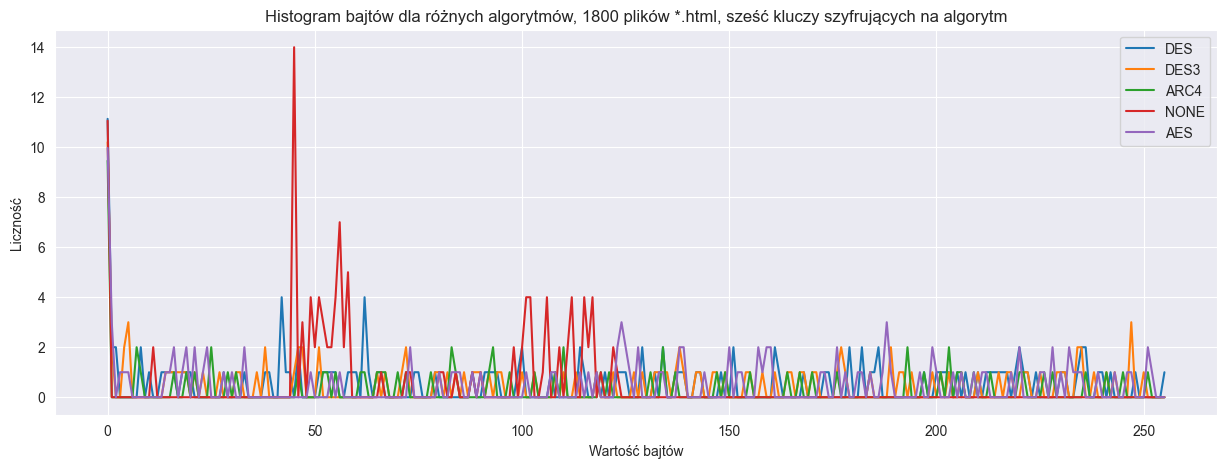

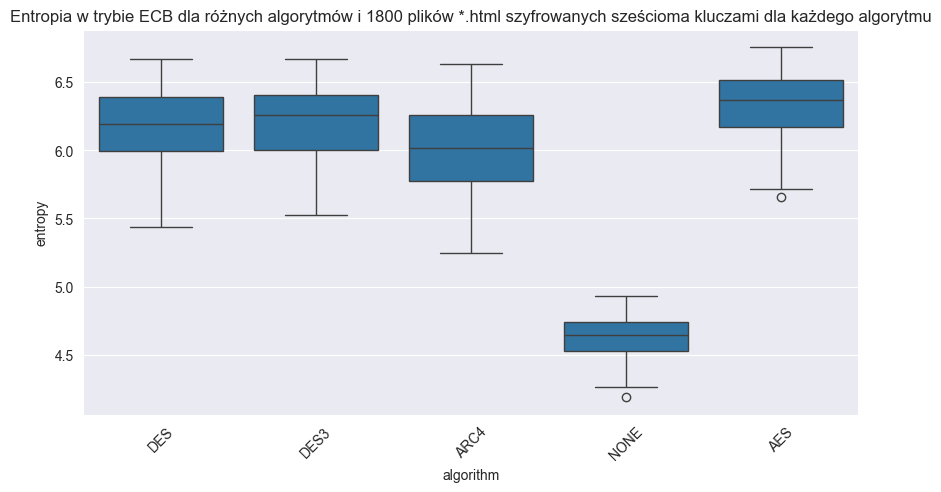

In [39]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_cbc_1800_6keys["algorithm"].unique()):
    subset = df_csv_cbc_1800_6keys[df_csv_cbc_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.html, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_cbc_1800_6keys["algorithm"], y=df_csv_cbc_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.html szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [40]:
df_pyth_cbc_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1800/features_cbc_1800_6keys_csv/features_pyth_cbc.csv'))
df_pyth_cbc_1800_6keys

file_name    format   entropy        mean     variance    std_dev  \
0     file0380.py.enc  pyth_cbc  7.971530  128.588764  5498.892121  74.154515   
1     file0666.py.enc  pyth_cbc  7.956870  128.366135  5542.260006  74.446357   
2     file0605.py.enc  pyth_cbc  7.970197  128.708097  5445.534555  73.793865   
3     file0705.py.enc  pyth_cbc  7.932306  129.303571  5613.891971  74.925910   
4     file0678.py.enc  pyth_cbc  7.946145  128.495775  5290.799684  72.737883   
...               ...       ...       ...         ...          ...        ...   
1795  file0075.py.enc  pyth_cbc  7.977985  126.663219  5501.342739  74.171037   
1796  file0108.py.enc  pyth_cbc  7.961297  127.341595  5543.549908  74.455019   
1797  file0008.py.enc  pyth_cbc  7.767551  127.373922  5381.292294  73.357292   
1798  file0116.py.enc  pyth_cbc  7.965227  127.500455  5528.488774  74.353808   
1799  file0016.py.enc  pyth_cbc  7.769620  130.235656  5410.278483  73.554595   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.015852 -1.199617  760212  10.333022  ...             30   
1    -0.045058 -1.215967  469426  10.199973  ...             15   
2    -0.033244 -1.199168  757134  10.352876  ...             29   
3    -0.034414 -1.235022  319532  10.279365  ...             13   
4    -0.004960 -1.163643  422815  10.250527  ...             12   
...        ...       ...     ...        ...  ...            ...   
1795  0.008866 -1.216480  951746  10.343396  ...             33   
1796 -0.006744 -1.207815  492211  10.299512  ...             30   
1797  0.017905 -1.222259  101019  10.433441  ...              4   
1798 -0.002468 -1.204690  690435  10.234174  ...             27   
1799 -0.033446 -1.185912  106686  10.455115  ...              5   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                29             29             37             30   
1                17             26             15             12   
2                15             31             33             30   
3                14             12             12             14   
4                16             12             10             24   
...             ...            ...            ...            ...   
1795             29             29             36             28   
1796             12             22             22             24   
1797              5              4              0              3   
1798             29             28             24             17   
1799              3              3              2              2   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                33             32             33             35        DES  
1                18             14             20             16        DES  
2                31             21             26             24        DES  
3                18              7             11             15        DES  
4                20             19             16             20        DES  
...             ...            ...            ...            ...        ...  
1795             31             24             31             32        AES  
1796             16             22             15             24        AES  
1797              4              4              2              2        AES  
1798             33             40             21             27        AES  
1799              6              5              1              5        AES  

[1800 rows x 267 columns]

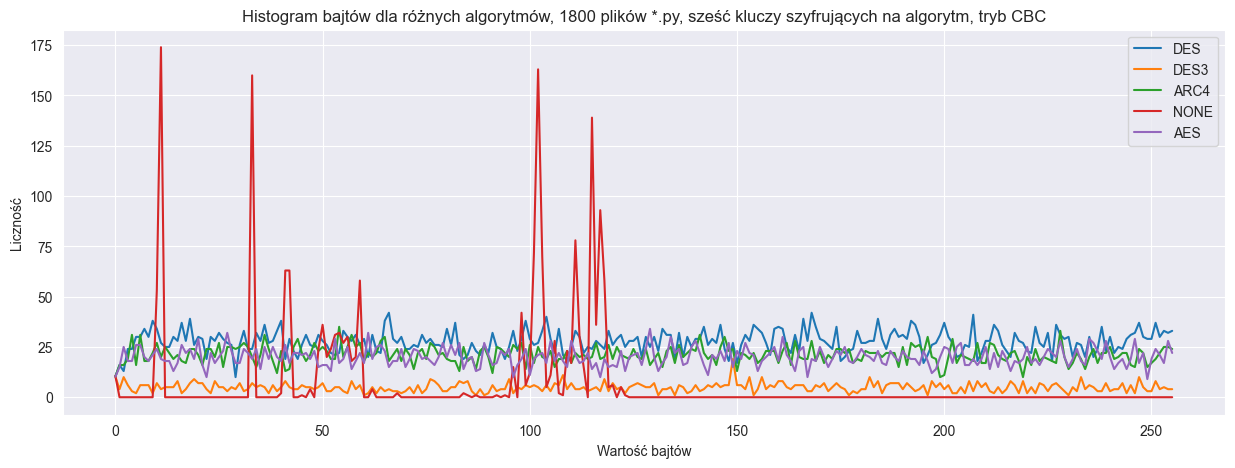

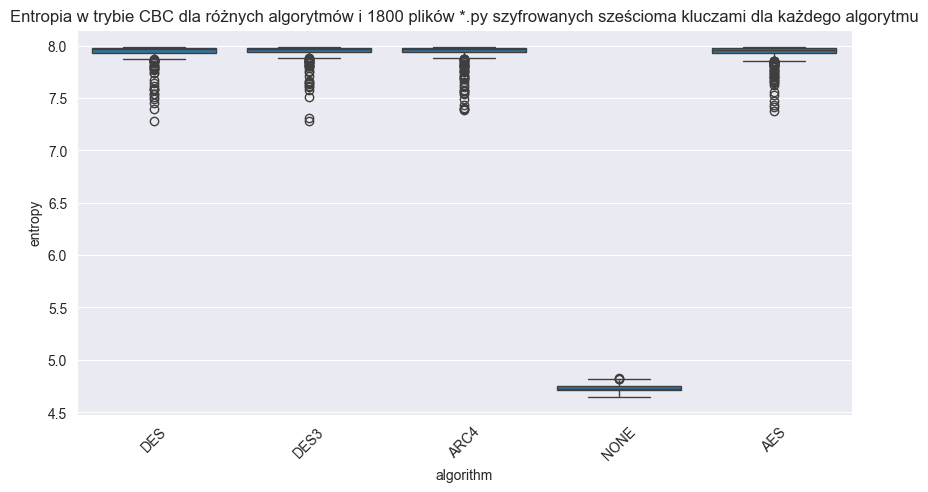

In [41]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_cbc_1800_6keys["algorithm"].unique()):
    subset = df_pyth_cbc_1800_6keys[df_pyth_cbc_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.py, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_cbc_1800_6keys["algorithm"], y=df_pyth_cbc_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.py szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [42]:
df_txt_cbc_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1800/features_cbc_1800_6keys_csv/features_txt_cbc.csv'))
df_txt_cbc_1800_6keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0712.txt.enc  txt_cbc  7.953638  128.284413  5541.727814  74.442782   
1     file0702.txt.enc  txt_cbc  7.961134  126.984508  5383.819582  73.374516   
2     file0474.txt.enc  txt_cbc  7.958516  126.494715  5407.615321  73.536490   
3     file0464.txt.enc  txt_cbc  7.939796  128.764543  5478.582372  74.017446   
4     file0416.txt.enc  txt_cbc  7.975101  127.517799  5397.104846  73.464991   
...                ...      ...       ...         ...          ...        ...   
1795  file0058.txt.enc  txt_cbc  7.901775  130.414725  5365.958830  73.252705   
1796  file0256.txt.enc  txt_cbc  7.978131  126.684437  5424.398832  73.650518   
1797  file0246.txt.enc  txt_cbc  7.980000  127.280477  5465.687234  73.930286   
1798  file0189.txt.enc  txt_cbc  7.959542  127.793901  5408.174003  73.540288   
1799  file0199.txt.enc  txt_cbc  7.849319  126.511765  5371.489567  73.290447   

      skewness  kurtosis  energy        rms  ...  histogram_247  \
0    -0.001986 -1.210252  415660  10.255590  ...             19   
1     0.009833 -1.189004  497641  10.276742  ...             16   
2     0.016500 -1.191380  456699  10.244024  ...             11   
3    -0.026375 -1.217773  302810  10.239683  ...             13   
4     0.005591 -1.179951  774259  10.256619  ...             37   
...        ...       ...     ...        ...  ...            ...   
1795 -0.010699 -1.189008  200691  10.310102  ...             12   
1796  0.007632 -1.178936  919638  10.213455  ...             34   
1797  0.004191 -1.211270  958208  10.286359  ...             37   
1798  0.001725 -1.202962  493033  10.325928  ...             13   
1799 -0.000366 -1.165983  139470  10.126770  ...              5   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                12             16             19             15   
1                14             19             14             15   
2                15             16             20             22   
3                12             12             11             17   
4                32             27             29             26   
...             ...            ...            ...            ...   
1795              8              6             10              4   
1796             28             26             35             36   
1797             37             33             39             33   
1798             18             20             17             19   
1799              5              6             10              3   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                15             12             18             16        DES  
1                17             19             21             17        DES  
2                19             20             18              7        DES  
3                20              6              7             13        DES  
4                30             28             42             32        DES  
...             ...            ...            ...            ...        ...  
1795              8              6              7              7        AES  
1796             33             39             30             38        AES  
1797             29             42             29             38        AES  
1798             20             23             19             21        AES  
1799              7              3              4              9        AES  

[1800 rows x 267 columns]

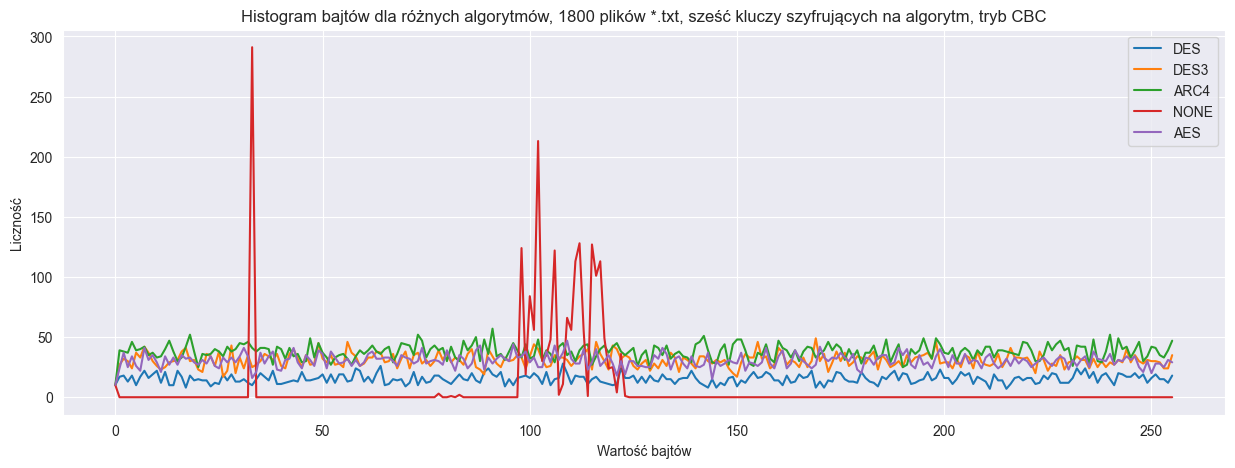

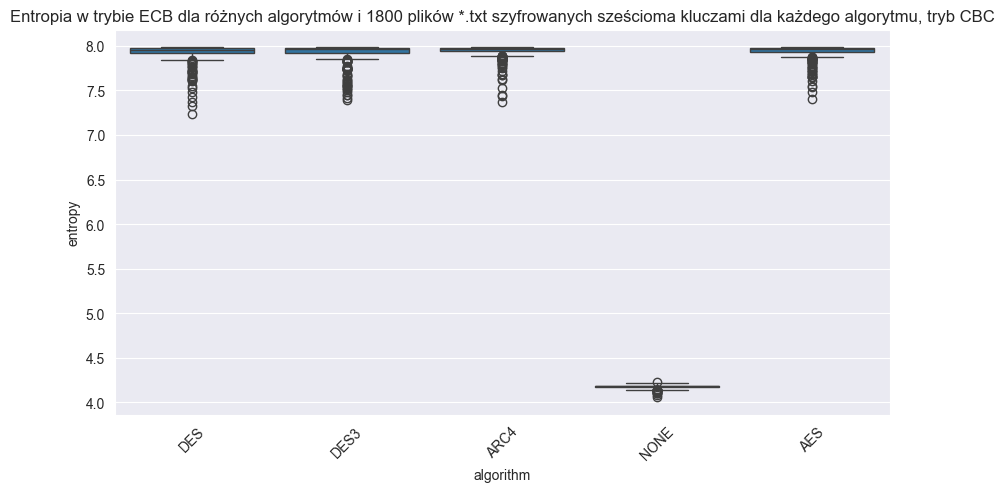

In [43]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_cbc_1800_6keys["algorithm"].unique()):
    subset = df_txt_cbc_1800_6keys[df_txt_cbc_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.txt, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_cbc_1800_6keys["algorithm"], y=df_txt_cbc_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1800 plików *.txt szyfrowanych sześcioma kluczami dla każdego algorytmu, tryb CBC")
plt.show()

In [44]:
df_wav_cbc_1800_6keys = pd.DataFrame(pd.read_csv(
    '../features_cbc/features_cbc_1800/features_cbc_1800_6keys_csv/features_wav_cbc.csv'))
df_wav_cbc_1800_6keys

file_name   format   entropy        mean     variance    std_dev  \
0     file0580.wav.enc  wav_cbc  7.997528  127.482698  5473.463420  73.982859   
1     file0590.wav.enc  wav_cbc  7.998831  127.242213  5466.137654  73.933332   
2     file0441.wav.enc  wav_cbc  7.999461  127.576127  5465.342964  73.927958   
3     file0539.wav.enc  wav_cbc  7.999420  127.404446  5452.409435  73.840432   
4     file0451.wav.enc  wav_cbc  7.998900  127.577164  5459.243581  73.886694   
...                ...      ...       ...         ...          ...        ...   
1795  file0211.wav.enc  wav_cbc  7.998124  127.044374  5458.597508  73.882322   
1796  file0263.wav.enc  wav_cbc  7.999069  127.616970  5461.767701  73.903773   
1797  file0273.wav.enc  wav_cbc  7.998212  127.944750  5452.541367  73.841326   
1798  file0105.wav.enc  wav_cbc  7.999110  127.538557  5459.029534  73.885246   
1799  file0115.wav.enc  wav_cbc  7.997919  127.308977  5451.345828  73.833230   

      skewness  kurtosis    energy        rms  ...  histogram_247  \
0    -0.001177 -1.198489   9296069  10.263076  ...            347   
1     0.006830 -1.202393  18634754  10.276462  ...            713   
2     0.000071 -1.203145  37286390  10.279605  ...           1373   
3     0.003977 -1.198271  27926197  10.272237  ...           1043   
4    -0.000952 -1.198355  18600826  10.267103  ...            686   
...        ...       ...       ...        ...  ...            ...   
1795  0.007469 -1.200830   9306763  10.268047  ...            329   
1796 -0.001267 -1.202786  18561761  10.256083  ...            714   
1797 -0.009486 -1.196661   9334905  10.283560  ...            356   
1798  0.000317 -1.198873  18625042  10.273551  ...            721   
1799  0.000224 -1.202868   9306070  10.267665  ...            343   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0               371            319            356            359   
1               714            689            696            717   
2              1308           1387           1385           1385   
3               971           1049           1074           1007   
4               667            655            704            717   
...             ...            ...            ...            ...   
1795            360            381            366            313   
1796            736            673            665            677   
1797            356            373            342            327   
1798            725            682            664            668   
1799            342            319            313            342   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               317            375            349            374        DES  
1               674            641            685            648        DES  
2              1387           1414           1434           1358        DES  
3              1063           1011           1067           1024        DES  
4               681            687            661            731        DES  
...             ...            ...            ...            ...        ...  
1795            331            322            326            331        AES  
1796            675            717            676            691        AES  
1797            332            347            330            370        AES  
1798            697            673            719            684        AES  
1799            318            358            315            349        AES  

[1800 rows x 267 columns]

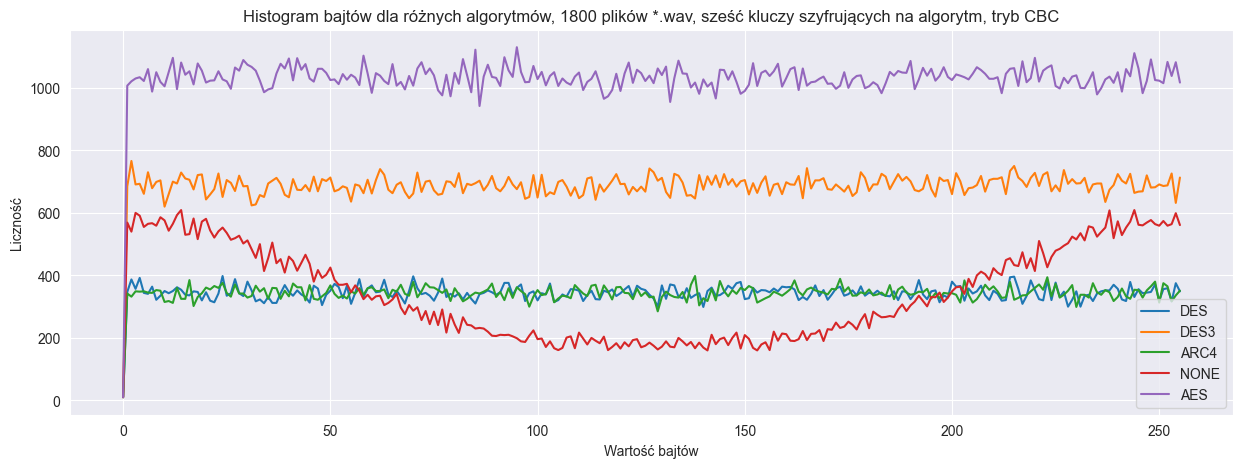

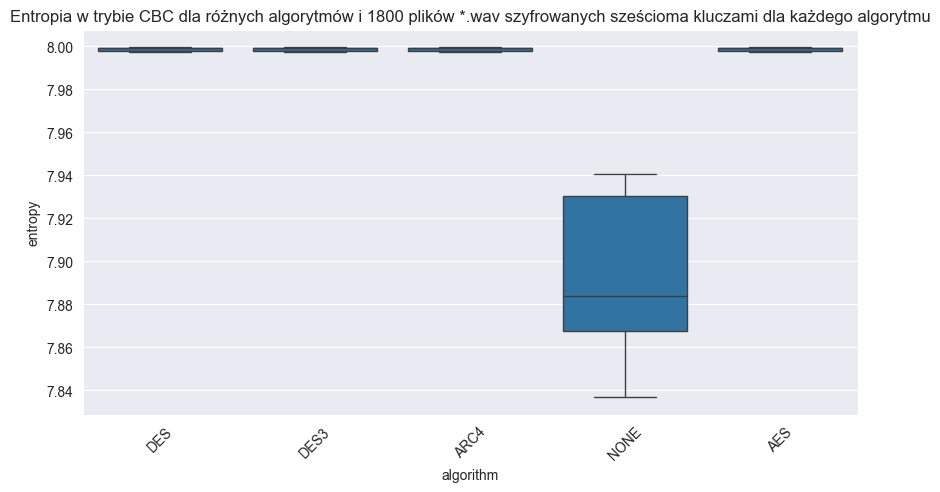

In [45]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_cbc_1800_6keys["algorithm"].unique()):
    subset = df_wav_cbc_1800_6keys[df_wav_cbc_1800_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1800 plików *.wav, sześć kluczy szyfrujących na algorytm, tryb CBC")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_cbc_1800_6keys["algorithm"], y=df_wav_cbc_1800_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie CBC dla różnych algorytmów i 1800 plików *.wav szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()